# Time seires forecasting fundamentals with Tensorflow + milestone project 3 : BitPredict 🤑💰💹

⚠️**Note :** this is not financial advice.

In [1]:
import quotes
print(quotes.quran_ayats())
print(quotes.random_qoutes())

('Quran : ', 'Do not despair of the mercy of Allāh. Indeed, Allāh forgives all sins. Indeed, it is He who is the Forgiving, the Merciful." (Quran 39:53)')
('Quote : ', 'Im not a great programmer; Im just a good programmer with great habits')


In [2]:
import motivation 
print(motivation.quotes())
print(motivation.quran_ayats())

Coding like poetry should be short and concise
Do not despair of the mercy of Allāh. Indeed, Allāh forgives all sins. Indeed, it is He who is the Forgiving, the Merciful." (Quran 39:53)


# Get data

We're going to be using the historical price data of bitcoin to try and predict the future of bitcoin 
<br>
link 1 'https://coinmarketcap.com/currencies/bitcoin/#Chart'
<br>
link 2  'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
<br>
we are using link 2

In [3]:
import pandas as pd 
# lets read in pur bitcoin data and parse our data 
# df = pd.read_csv('BTC_All_graph_coinmarketcap.csv',parse_dates=['timestamp'],index_col=['timestamp'])
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',parse_dates=['Date'],index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# only want closing prie for eah day 

bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'price of bitcoin ')

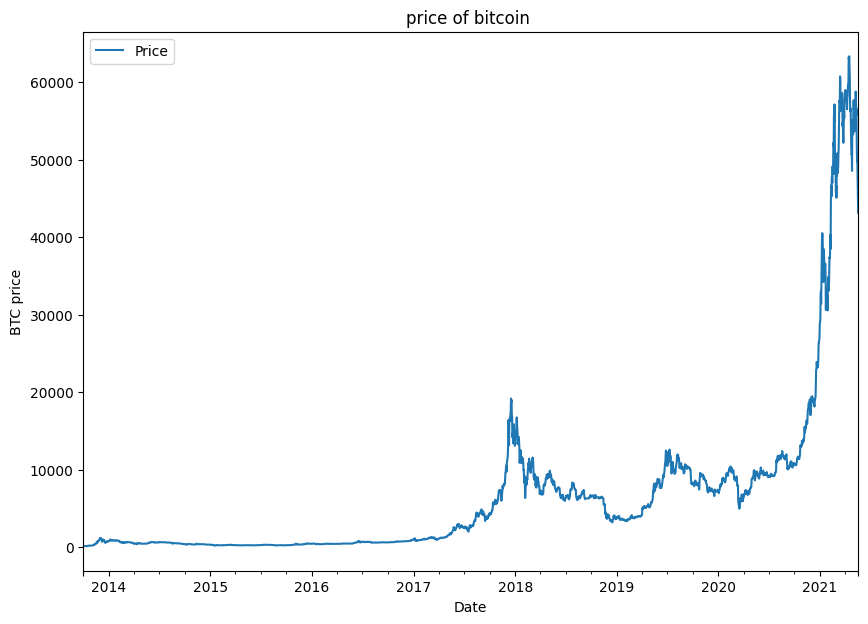

In [7]:
import matplotlib.pyplot as plt 
bitcoin_prices.plot(figsize= (10,7))

plt.ylabel('BTC price')
plt.title('price of bitcoin ')

# Importing time series data with python CSV module

In [8]:
# python csv 
import csv 
from datetime import datetime 
timesteps = []
btc_price =[]

with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:

    csv_reader = csv.reader(f,delimiter =',')
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],'%Y-%m-%d'))
        btc_price.append(float(line[2]))



# View first 10 of each 
timesteps[:10] ,btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'bitcoin prices')

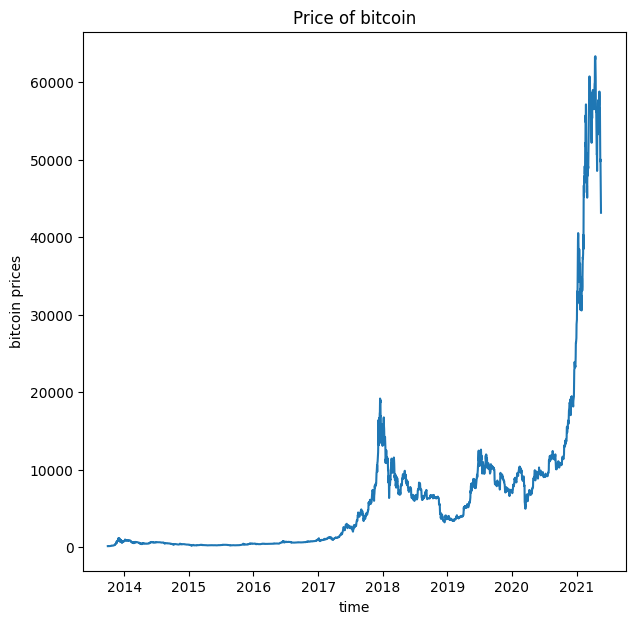

In [9]:
# plot from CSV 
import numpy as np

plt.figure(figsize=(7,7))
plt.plot(timesteps,btc_price)
plt.title('Price of bitcoin')
plt.xlabel('time')
plt.ylabel('bitcoin prices')

# Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [10]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [11]:
# Get bitcoin date array 
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
# wrong way to make train/test sets for time series data

from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train,y_test = train_test_split(timesteps, #dates
                                                   prices,
                                                   test_size = 0.2,
                                                   random_state = 42
                                                   )

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

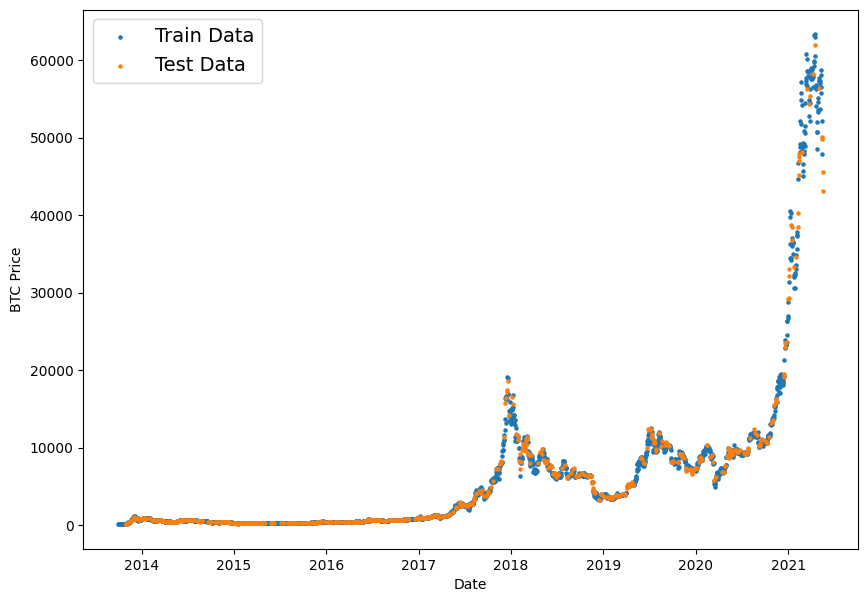

In [13]:
# Lets plot wrong train and test splits 

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train , s= 5,label='Train Data')
plt.scatter(X_test,y_test , s= 5,label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize = 14)
plt.show()

## Creating train test data splits in right way 

In [14]:
# Create train and test splits the right way for time series data 
split_size = int(0.8 * len(prices)) 

# create train data splits
X_train,y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits 
X_test ,y_test = timesteps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)


(2229, 558, 2229, 558)

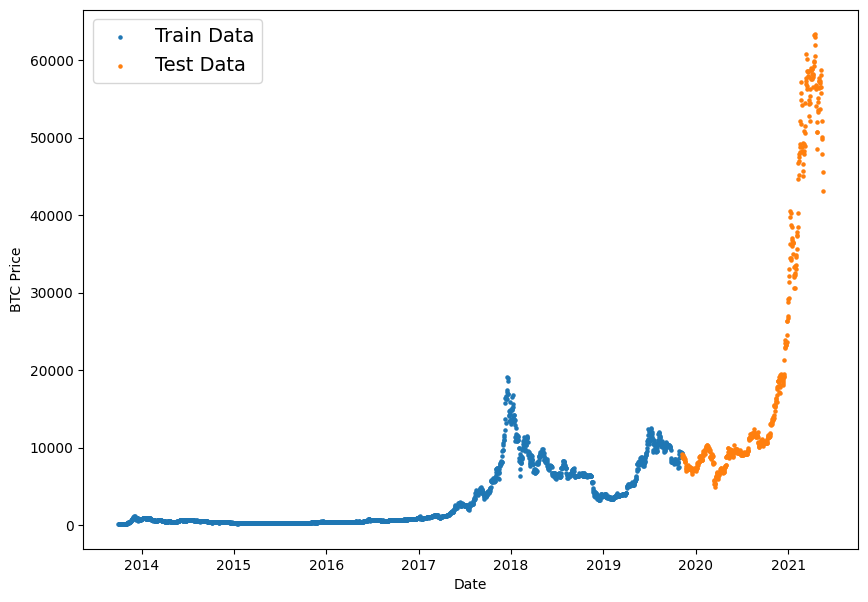

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train , s= 5,label='Train Data')
plt.scatter(X_test,y_test , s= 5,label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize = 14)
plt.show()

# Create a plotting function

In [16]:
# Create a function to plot time series data 

def plot_time_series(timesteps,values,format='',start =0,end =None,label=None):
    """
    Plots timesteps against values 

    Parameters
    <----------->
    timestemps : array of timestep values
    values : array of values across time
    format : style of  plot , default "."
    start : where to start the plot 
    end : where to end the plot 
    label : label to show on plot about values defalt "None"
    """
    
    # plot the series 
    # plt.figure(figsize=(10,7))
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize =14)
    plt.grid(True)


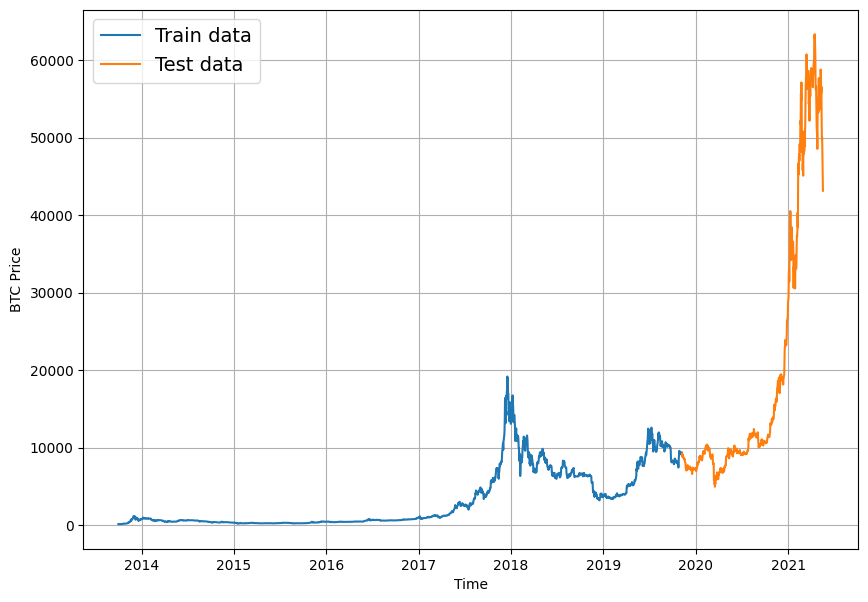

In [17]:
# Testing our plotting funtion 
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label='Train data')
plot_time_series(timesteps=X_test,values=y_test,label ='Test data')

## Modelling Experiments 

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon



## Experiment | model
------------------
* 0          | Naive model (baseline)
* 1          | Dense model
* 2          | same as model 1
* 3          | same as model 1 (with different window size)
* 4          | Conv1D
* 5          | LSTM
* 6          | Same as model 
* 7          | N-BEATS algorithm
* 8          | Ensemble model
* 9          | Future prediction model
* 10         | same as model 1 (but with turkey data introduced)












## Model 0: Naive forecast (baseline)


The formula looks like this :
$$\hat{y}_{t} = y_{t-1}$$








In [18]:
# Create a naive forecast 

naive_forecast =  y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

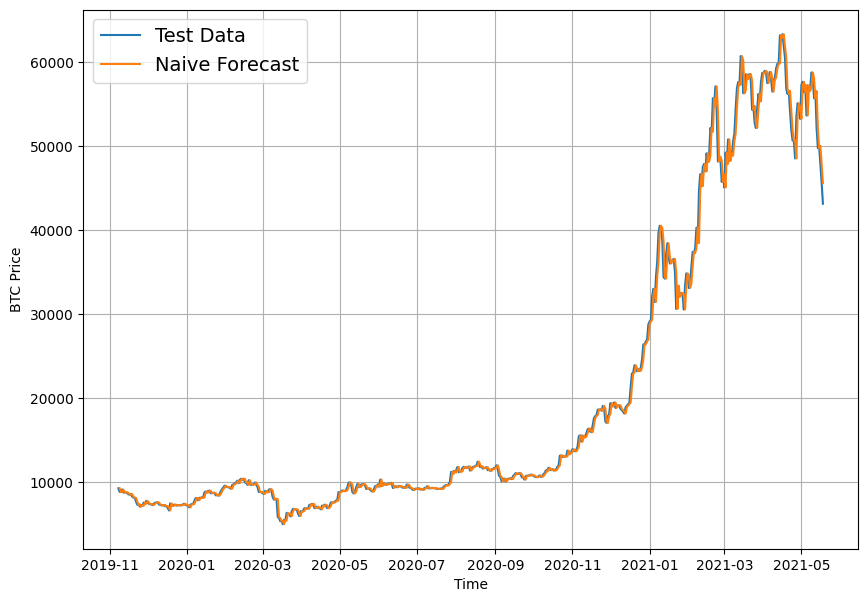

In [19]:
# Plot naive forecast 
plt.figure(figsize=(10,7))
# ax = plt.axes()
# ax.set_facecolor('black')
# plot_time_series(timesteps=X_train,values=y_train,label='Train data')
plot_time_series(timesteps=X_test,values=y_test,label='Test Data')
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format='-',label='Naive Forecast')

## Evaluating a time series model 

A few common regression metircs which are also used in forecasting problems:

* **MAE** -> Mean absolute error 
* **MSE** -> Mean Squared Error 
* **RMSE** -> Root mean squared Error 
* **MASE** -> mean absolute percentage error 



In [20]:
import tensorflow as tf 

In [21]:
# MASE implementation 

def mean_absolute_scaled_error(y_true,y_pred):
    """
    Implement MASE
    """

    mae  = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast 
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

    return mae / mae_naive_no_season

In [22]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182626

In [23]:
# Create a function to take in model predictions and truth values and return evaluation results 

def evaluate_preds(y_true,y_pred):
    # Make sure float32 datatype 
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(y_pred,dtype=tf.float32)

    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred) # type: ignore
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred) # type: ignore
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)     # type: ignore
    mase = mean_absolute_scaled_error(y_true,y_pred)

    return {'mae':mae.numpy(),
            'mape':mape.numpy(),
            'mase':mase.numpy(),
            'mse': mse.numpy(),
            'rmse': rmse.numpy()}
            

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957013,
 'mse': 1147547.1,
 'rmse': 1071.2362}

## Format Data Part 2: Windowing our dataset

why do we window?



We window our time series dataset to turn our data into supervised learning problem 

In [25]:
print(f'We want to use : {btc_price[:7]} to predict this : {btc_price[7]}')

We want to use : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this : 123.033


In [26]:
# Lets setup global variables for windows and horizon 

HORIZON = 1  # predict next 1 day  
WINDOW_SIZE = 7 # Use the past week of Bitoin data to make the prediction

In [27]:
# Create Function to label Windowed data 

def get_labelled_windows(x,horizon=HORIZON):
    """
    Creates labels for windowed dataset

    """
    return x[: ,:-horizon],x[:,-horizon:]

In [28]:
# Test out the window labelling function
test_window ,test_label = get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
# test_window,test_label
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label : {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label : 7


Lets create a function which does below tasks:

1. Create a window step of specific window size (eg [0,1,2,3,4,5,6])
2. Use NumPy indexing to create a 2D array of multiple window steps for example :

    [[0,1,2,3,4,5,6],

    [1,2,3,4,5,6,7],

    [2,3,4,5,6,7,8]]

3. Uses the 2D array of multiple window steps (from 2) to index on target series 
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon 


In [29]:
def make_windows(x,window_size =WINDOW_SIZE,horizon =HORIZON):
    """
    Turns a 1D array into 2D array of sequential labelled windows of window_size with horizon size labels 
    """
    # 1. Create a window of specific window_size 
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

    # 2. Create a 2D array of multiple window steps 
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon -1)),axis=0).T
    # print(f'Window indexes: \n {window_indexes,window_indexes.shape}')

    # 3 Index on the target array with 2D array of multiple window steps 
    windowed_array = x[window_indexes]
    # print(windowed_array)

    # Get the labelled windows 
    windows,labels = get_labelled_windows(windowed_array,horizon=horizon)
    return windows ,labels


In [30]:
full_windows , full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows) , len(full_labels)

(2780, 2780)

In [31]:
# View the first 3 windows/labels 
for i in range(3):
    print(f'window: {full_windows[i]} -> Label: {full_labels[i]}')

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [32]:
# View the last 3 windows/labels 
for i in range(3):
    print(f'window: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets 

In [33]:
# Make the train/test splits 

def make_train_test_splits(windows,labels,test_split = 0.2):
    """
    Splits matching pairs of windows and labels into train and test splits 
    """

    split_size = int(len(windows)* (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]

    return train_windows,test_windows,train_labels,test_labels

In [34]:
# Create train and test windows 

train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [35]:
train_windows[:5] , train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [36]:
test_windows[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [37]:
# Check to see if train labels are the same 
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:]),

(True,)

## Make a modelling checkpoint callback


In [38]:
import os 

# Create a function to implement a ModelCheckpoint callback with a specific filename 

def create_model_checkpoint(model_name,save_path ='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),# type: ignore
                                              monitor = 'val_loss',
                                              verbose = 0,
                                              save_best_only=True) 

## Model 1: Dense model (window = 7 , horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLu
* An outout layer with linear activation 
* Adam optimization and MAE loss function 
* Batch size of 128 
* 100 epochs 

In [39]:
import tensorflow as tf 
from tensorflow.keras import layers # type: ignore

# Set random seed for as reproducible results as possible

# 1 . construct model 
model_1 = tf.keras.Sequential([ # type: ignore
    layers.Dense(128,activation ='relu'),
    layers.Dense(HORIZON,activation='linear')
],name = 'model_1_dense')

# 2. Compile 
model_1.compile(loss ='mae',optimizer = tf.keras.optimizers.Adam(),metrics = ['mae','mse']) # type: ignore

# 3 fit the model 
model_1.fit(x =train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 32ms/step - loss: 609.3672 - mae: 609.3672 - mse: 1451586.6250 - val_loss: 1204.5771 - val_mae: 1204.5771 - val_mse: 4766185.0000
Epoch 2/100
18/18 [==============================] - 0s 19ms/step - loss: 245.8297 - mae: 245.8297 - mse: 281449.8750 - val_loss: 1127.0641 - val_mae: 1127.0641 - val_mse: 4206200.5000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 211.4904 - mae: 211.4904 - mse: 219131.5312 - val_loss: 1162.4165 - val_mae: 1162.4165 - val_mse: 4071027.0000
Epoch 4/100
18/18 [==============================] - 0s 19ms/step - loss: 186.2182 - mae: 186.2182 - mse: 181763.8125 - val_loss: 1002.5446 - val_mae: 1002.5446 - val_mse: 3265235.7500
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 174.2689 - mae: 174.2689 - mse: 162189.3594 - val_loss: 975.5347 - val_mae: 975.5347 - val_mse: 3041247.7500
Epoch 6/100
18/18 [==============================] - 0s 19ms/step - loss: 166

In [40]:
# Evaluate model on test data 
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 736.3176 - mae: 736.3176 - mse: 1553061.0000


[736.3175659179688, 736.3175659179688, 1553061.0]

In [41]:
# Load in saved best performing model_1 and evaluate it on test data 
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/') # type: ignore
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 566.0342 - mae: 566.0342 - mse: 1160285.1250


[566.0341796875, 566.0341796875, 1160285.125]

## Making forecasts with a model (on test data)

To make "Forecasts" on the test dataset , Lets write a function to :

1. Take in a train model
2. Takes in some inputs data 
3. Passes the input data to the model predict method 
4. Return the predictions 

In [42]:
def make_preds(model,input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) 


In [43]:
# Make predicitons using model_1 on the test datasets 
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8850.111 , 8796.21  , 9039.366 , 8779.981 , 8734.912 , 8732.8   ,
        8680.3125, 8521.659 , 8456.107 , 8530.614 ], dtype=float32)>)

In [44]:
model_1_preds.shape,test_labels.shape

(TensorShape([556]), (556, 1))

In [45]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': 566.03424,
 'mape': 2.5274038,
 'mase': 0.9943654,
 'mse': 1160285.0,
 'rmse': 1077.1653}

In [46]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 566.03424,
 'mape': 2.5274038,
 'mase': 0.9943654,
 'mse': 1160285.0,
 'rmse': 1077.1653}

In [47]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957013,
 'mse': 1147547.1,
 'rmse': 1071.2362}

In [48]:
np.expand_dims(test_labels.shape,axis=1)

array([[556],
       [  1]])

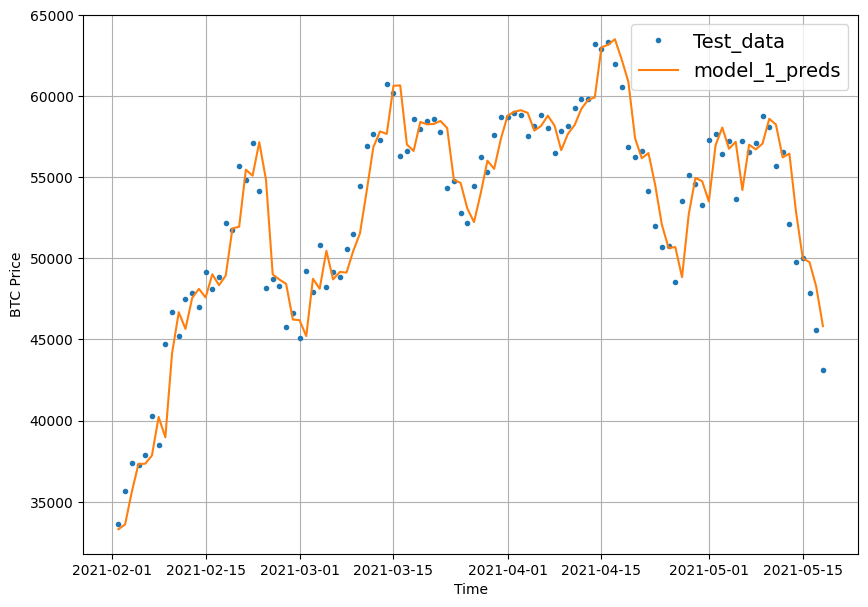

In [49]:
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                  values=test_labels[:],
                    start=offset,
                    format= '.',
                    label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                  values=model_1_preds,
                    start=offset,
                    format="-",
                    label="model_1_preds")
     

## Model 2: Dense (Window = 30 , hoirzon = 1)

In [50]:
HORIZON = 1
WINDOW_SIZE = 30  

In [51]:
full_windows ,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows) , len(full_labels)

(2757, 2757)

In [52]:
# Make train and testing windows 

train_windows ,test_windows,train_labels,test_labels = make_train_test_splits(windows=full_windows,labels=full_labels,test_split=0.2)

len(train_windows),len(test_windows) ,len(train_labels) ,len(test_labels)

(2205, 552, 2205, 552)

In [53]:
train_windows[:3] , train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [54]:
tf.random.set_seed(42)

# Create model 
model_2 = tf.keras.Sequential([ # type: ignore
    layers.Dense(128 , activation= 'relu'),
    layers.Dense(HORIZON)
],name = 'model_2_dense')

# Compile model 
model_2.compile(loss ='mae',
                optimizer = tf.keras.optimizers.Adam()) # type: ignore

# Fit 
model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [55]:
# Evaluate model 2 on test data 
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 703.2801


703.2800903320312

In [56]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/') # type: ignore
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 607.3587


607.3587036132812

In [57]:
# Get forecast prediciton
model_2_preds = make_preds(model_2,input_data=test_windows)


18/18 [==============================] - 0s 2ms/step


In [58]:
model_2_preds.shape,tf.squeeze(test_labels).shape

(TensorShape([552]), TensorShape([552]))

In [59]:
# Evaluate results for model 2 prediction
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'mae': 607.3587,
 'mape': 2.7270956,
 'mase': 1.061669,
 'mse': 1281566.6,
 'rmse': 1132.063}

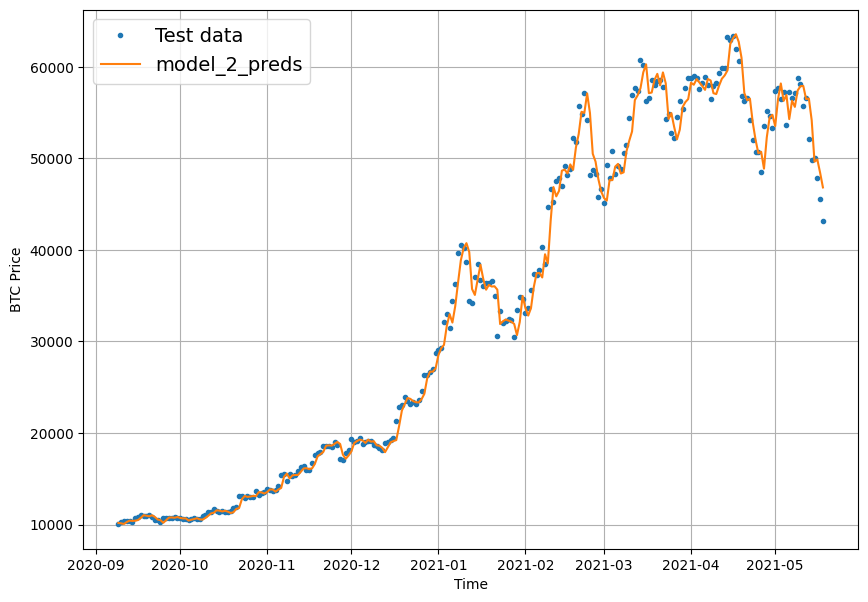

In [60]:
offset = 300 
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting 
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:],start=offset,label='Test data',format= '.')
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format='-',label='model_2_preds')

## Model 3:

In [61]:
WINDOW_SIZE = 30 
HORIZON = 7

full_windows ,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels),

(2751, 2751)

In [62]:
train_windows , test_windows,train_labels,test_labels = make_train_test_splits(windows=full_windows,labels=full_labels)

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [63]:
tf.random.set_seed(42)

# Create model 
model_3 = tf.keras.Sequential([ # type: ignore
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON),
],name ='model_3_dense')

# compile 
model_3.compile(loss='MAE',
                optimizer = tf.keras.optimizers.Adam()) # type: ignore

# Fit 
model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs =100,
            verbose = 1,
            validation_data  =(test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name=model_3.name)])



Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 1194.9803 - val_loss: 2658.9065
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 482.4703 - val_loss: 2403.2681
Epoch 3/100
18/18 [==============================] - 0s 19ms/step - loss: 392.8185 - val_loss: 1937.0159
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 350.5764 - val_loss: 1820.5864
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 328.7625 - val_loss: 1790.9622
Epoch 6/100
18/18 [==============================] - 0s 18ms/step - loss: 310.7353 - val_loss: 1697.6711
Epoch 7/100
18/18 [==============================] - 0s 18ms/step - loss: 296.6468 - val_loss: 1633.8992
Epoch 8/100
18/18 [==============================] - 0s 19ms/step - loss: 289.5691 - val_loss: 1533.2489
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 281.1586 - val_loss: 1697.1940
Epoch 10/100
18/18 [==============================] - 0

In [64]:
# Evaluate the model on the test data 
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1303.3945


1303.39453125

In [65]:
# load best version of model 3 and evaluate 
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/') # type: ignore
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1216.1006


1216.1005859375

In [66]:
# make predicitons of model 3 
model_3_preds = make_preds(model_3,input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9202.517 , 9424.454 , 9107.993 , 9524.312 , 9451.115 , 9773.886 ,
        9710.572 ],
       [8995.472 , 9048.411 , 9044.055 , 9197.259 , 9108.398 , 9434.034 ,
        9394.848 ],
       [8703.946 , 8908.991 , 9021.127 , 9082.169 , 9021.295 , 9045.82  ,
        9103.219 ],
       [8866.972 , 9176.483 , 9169.602 , 9142.147 , 9317.308 , 9163.841 ,
        9235.673 ],
       [8888.874 , 9064.811 , 8916.205 , 9217.182 , 9107.6455, 8958.8   ,
        9037.982 ]], dtype=float32)>

In [67]:
model_3_preds.shape,model_2_preds.shape

(TensorShape([551, 7]), TensorShape([552]))

In [68]:
# Evaluate model_3 results 
model_3_results = evaluate_preds(y_true=np.expand_dims(test_labels,axis=1),y_pred= model_3_preds)
model_3_results

{'mae': array([[  663.192  ,   392.03363,   233.57228, ..., 50369.395  ,
         49873.727  , 48378.93   ],
        [  705.15125,   432.7482 ,   308.62277, ..., 50411.35   ,
         49915.684  , 48420.887  ],
        [  752.12   ,   494.84253,   387.29132, ..., 50458.324  ,
         49962.652  , 48467.86   ],
        ...,
        [43432.39   , 43714.16   , 43905.004  , ...,  6281.2915 ,
          5981.0015 ,  4904.889  ],
        [41647.02   , 41928.793  , 42119.637  , ...,  8059.178  ,
          7563.512  ,  6068.7144 ],
        [39851.152  , 40132.92   , 40323.766  , ...,  9855.046  ,
          9359.38   ,  8049.3716 ]], dtype=float32),
 'mape': array([[  7.5918303,   4.4900885,   2.6740868, ..., 572.9911   ,
         567.4276   , 550.3523   ],
        [  8.113739 ,   4.9999843,   3.5533109, ..., 576.3271   ,
         570.68604  , 553.56165  ],
        [  8.735027 ,   5.754847 ,   4.471461 , ..., 580.1709   ,
         574.5608   , 557.27924  ],
        ...,
        [ 82.01104  ,  8

## Make our evaluation function work for larger horizon 

In [69]:

def evaluate_preds(y_true,y_pred):

    # Make sure float32 datatype 
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(y_pred,dtype=tf.float32)

    # Calculate various evaluation metrics 
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred) # type: ignore
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred) # type: ignore
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)     # type: ignore
    mase = mean_absolute_scaled_error(y_true,y_pred)
    
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)



    return {'mae':mae.numpy(),
            'mape':mape.numpy(),
            'mase':mase.numpy(),
            'mse': mse.numpy(),
            'rmse': rmse.numpy()}

In [70]:
# Get model_results aggregated to single values 
model_3_results = evaluate_preds(y_true=test_labels,y_pred=model_3_preds)
model_3_results

{'mae': 1216.1006,
 'mape': 5.4299817,
 'mase': 2.1639829,
 'mse': 5294217.5,
 'rmse': 1400.5962}

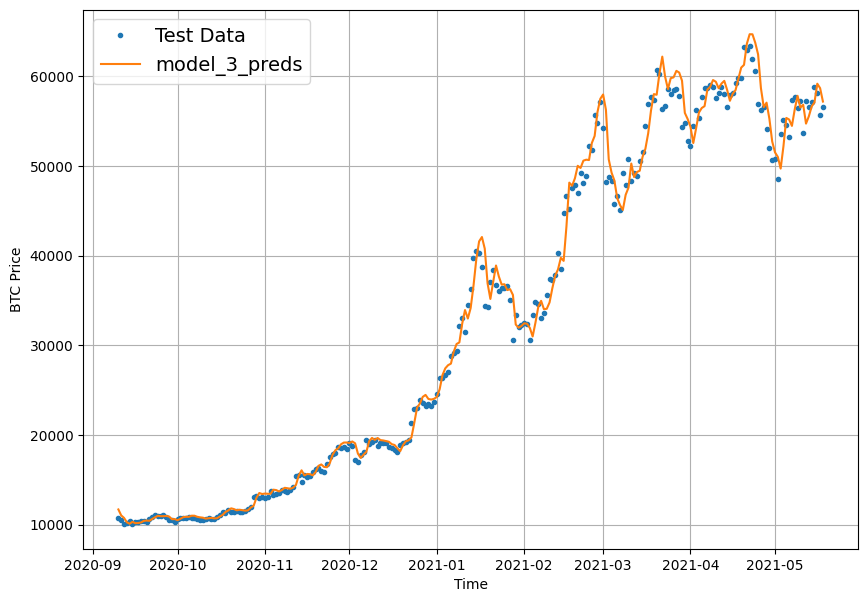

In [71]:
offset  = 300 
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values= test_labels[:,0],start=offset ,label='Test Data',format='.')
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis = 1),start =offset,label='model_3_preds')

## Which of our models is performing the best so far ?


<Axes: >

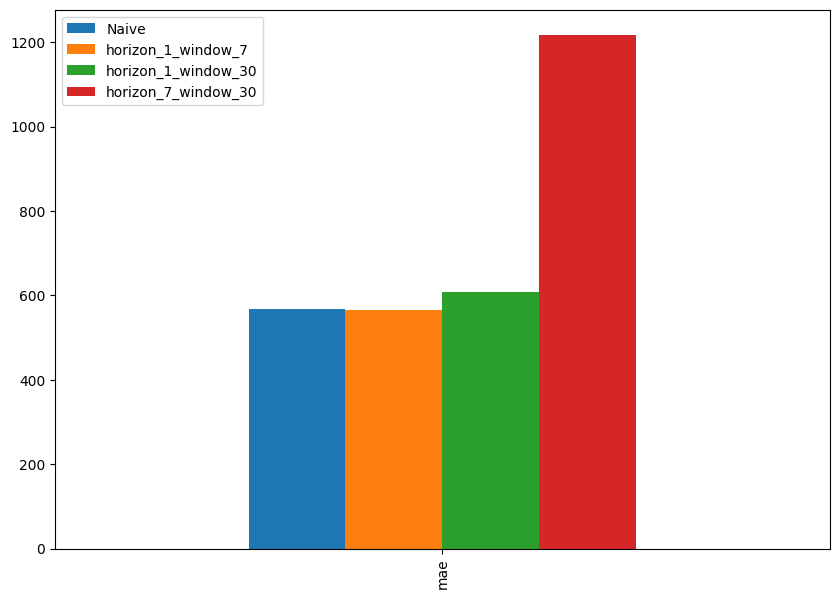

In [72]:
pd.DataFrame({'Naive':naive_results["mae"],
              'horizon_1_window_7':model_1_results["mae"],
              'horizon_1_window_30':model_2_results["mae"],
              'horizon_7_window_30':model_3_results["mae"]
            },index =['mae']).plot(figsize=(10,7),kind='bar')

## Model 4 : Conv1D 

In [73]:
HORIZON =1 
WINDOW_SIZE = 7

In [74]:
# Create windowed data 
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [75]:
# create train/test sets 
train_windows ,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer we need an input shape of : (batch_size , timesteps , input_dim)

However our data is not in that shape yet 

In [76]:
# Check data input shape 
train_windows[0].shape

(7,)

In [77]:
# Before we pass our data to the Conv1D layer , we have to reshape it in order to make sure it works

x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [78]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [79]:
# Test out our lambda layer 
print(f'Original shape:{x.shape}') # type: ignore
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n{expand_dims_layer(x)}')

Original shape:(7,)
Expanded shape: (7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [80]:
tf.random.set_seed(42)

# Create a Conv1D model
model_4 = tf.keras.Sequential([                                                                              # type: ignore
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size =5,padding='causal',activation ='relu'),
    layers.Dense(HORIZON),
],name ='model_4_conv1D')

# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam()) # type: ignore

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [81]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Evaluate model 
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 592.6944


592.6943969726562

In [83]:
# Load back in best performing Conv1D and re-evaluate 
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D/') # type: ignore
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 570.0953


570.0952758789062

In [84]:
# Make predictions 
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8875.267, 8766.028, 8988.575, 8783.029, 8720.09 , 8719.087,
       8678.117, 8523.011, 8441.738, 8509.365], dtype=float32)>

In [85]:
# Evaluate predictions 
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_4_preds)
model_4_results

{'mae': 570.0954,
 'mape': 2.5608573,
 'mase': 1.0014998,
 'mse': 1184601.5,
 'rmse': 1088.3939}

## Model 5: RNN (LSTM)

In [86]:
tf.random.set_seed(42)

# Let build an LSTM model with the Functional API

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis =1))(inputs)
# x = layers.LSTM(18,return_sequences=True)(x)
x = layers.LSTM(128,activation='relu')(x)
# x = layers.Dense(32,activation='relu')(x)
output =layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs , outputs=output,name='model_5_LSTM') # type: ignore

# Compile 
model_5.compile(loss='mae',optimizer =tf.keras.optimizers.Adam()) # type: ignore

# Fit 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])
            

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2284.9604INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 70ms/step - loss: 2284.9604 - val_loss: 6560.9683
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 459.1273INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 67ms/step - loss: 447.4366 - val_loss: 2028.3698
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 249.6325INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 60ms/step - loss: 242.9862 - val_loss: 1269.6632
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 199.1591INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 60ms/step - loss: 199.1401 - val_loss: 1158.2856
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 199.9623INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 62ms/step - loss: 193.7645 - val_loss: 1104.6733
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 192.4474INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 192.4474 - val_loss: 1063.6846
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 197.8400INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 60ms/step - loss: 192.6050 - val_loss: 1056.9418
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 187.0079INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 60ms/step - loss: 188.3148 - val_loss: 1056.6681
Epoch 9/100
15/18 [========================>.....] - ETA: 0s - loss: 189.0456INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 61ms/step - loss: 186.2732 - val_loss: 1055.1764
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 181.0522INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 66ms/step - loss: 184.2645 - val_loss: 1038.4500
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 183.6717INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 183.5925 - val_loss: 1020.3784
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 183.9772INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 56ms/step - loss: 182.5172 - val_loss: 1014.5007
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 176.3647INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 65ms/step - loss: 178.1976 - val_loss: 1010.1772
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 175.9455 - val_loss: 1022.5998
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 179.0739INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 175.4275 - val_loss: 980.1121
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 172.0569INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 56ms/step - loss: 172.0569 - val_loss: 952.1628
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 170.2925 - val_loss: 1062.3859
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 170.0661 - val_loss: 996.0742
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 164.7079 - val_loss: 960.3435
Epoch 20/100
10/18 [===============>..............] - ETA: 0s - loss: 170.8414INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 55ms/step - loss: 163.9532 - val_loss: 903.4855
Epoch 21/100
18/18 [==============================] - 0s 8ms/step - loss: 160.9686 - val_loss: 911.3669
Epoch 22/100
18/18 [==============================] - 0s 8ms/step - loss: 158.2195 - val_loss: 908.3800
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 156.6431 - val_loss: 924.0585
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 154.2001INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 67ms/step - loss: 154.2540 - val_loss: 865.9813
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 151.5856 - val_loss: 883.2381
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 146.1942INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 53ms/step - loss: 149.0678 - val_loss: 827.1197
Epoch 27/100
18/18 [==============================] - 0s 6ms/step - loss: 147.9352 - val_loss: 848.8442
Epoch 28/100
13/18 [====================>.........] - ETA: 0s - loss: 144.9240INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 53ms/step - loss: 146.1709 - val_loss: 803.5738
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 142.6520 - val_loss: 806.5074
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 142.4810 - val_loss: 881.6462
Epoch 31/100
13/18 [====================>.........] - ETA: 0s - loss: 144.3863INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 54ms/step - loss: 142.5333 - val_loss: 777.3871
Epoch 32/100
 9/18 [==============>...............] - ETA: 0s - loss: 136.9240INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 137.7928 - val_loss: 757.1439
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 135.9960INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 68ms/step - loss: 135.9960 - val_loss: 753.0280
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 132.8890INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 134.2075 - val_loss: 752.8152
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 134.7140INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 132.3062 - val_loss: 738.6642
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 134.8317INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 65ms/step - loss: 135.4755 - val_loss: 725.9850
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 129.1102INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 130.0751 - val_loss: 710.5618
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 128.3880INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 128.3775 - val_loss: 702.0653
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 128.7448 - val_loss: 762.2914
Epoch 40/100
18/18 [==============================] - 0s 10ms/step - loss: 131.6302 - val_loss: 749.2484
Epoch 41/100
18/18 [==============================] - 0s 8ms/step - loss: 128.2610 - val_loss: 722.1361
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 124.9182INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 56ms/step - loss: 124.9182 - val_loss: 684.9505
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 116.8445INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 67ms/step - loss: 123.7425 - val_loss: 670.4070
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 126.0751INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 124.9882 - val_loss: 665.2745
Epoch 45/100
18/18 [==============================] - ETA: 0s - loss: 122.9085INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 122.9085 - val_loss: 660.5259
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 122.0641INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 122.4669 - val_loss: 659.5136
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 122.5195 - val_loss: 676.5199
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 119.7121INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 120.8638 - val_loss: 656.6958
Epoch 49/100
18/18 [==============================] - 0s 9ms/step - loss: 119.2326 - val_loss: 661.1762
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 125.5918 - val_loss: 688.2408
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4436 - val_loss: 667.5349
Epoch 52/100
11/18 [=================>............] - ETA: 0s - loss: 124.6321INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 67ms/step - loss: 118.0465 - val_loss: 632.9357
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 118.7931 - val_loss: 637.8563
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 119.0754 - val_loss: 668.1884
Epoch 55/100
10/18 [===============>..............] - ETA: 0s - loss: 125.5030INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 56ms/step - loss: 117.7377 - val_loss: 627.5936
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4433 - val_loss: 653.8359
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 126.3755INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 126.3755 - val_loss: 626.2599
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 117.3705INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 117.3705 - val_loss: 619.2076
Epoch 59/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8879INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 69ms/step - loss: 114.8328 - val_loss: 617.5764
Epoch 60/100
18/18 [==============================] - 0s 9ms/step - loss: 114.9961 - val_loss: 621.1895
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 115.0595 - val_loss: 625.0706
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 114.1044 - val_loss: 629.7670
Epoch 63/100
10/18 [===============>..............] - ETA: 0s - loss: 129.0334INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 118.0721 - val_loss: 610.7894
Epoch 64/100
18/18 [==============================] - 0s 9ms/step - loss: 114.5379 - val_loss: 682.4169
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 118.2247 - val_loss: 614.7699
Epoch 66/100
18/18 [==============================] - 0s 8ms/step - loss: 113.6539 - val_loss: 617.4120
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9416 - val_loss: 612.1484
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 117.0363 - val_loss: 613.6849
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 119.2767 - val_loss: 642.7368
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 119.4419 - val_loss: 615.3984
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 113.2859 - val_loss: 612.9661
Epoch 72/100
10/18 [===============>..............] - ETA: 0s - loss: 114.16

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 57ms/step - loss: 114.5558 - val_loss: 601.6563
Epoch 73/100
18/18 [==============================] - 0s 9ms/step - loss: 112.2643 - val_loss: 610.1104
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 112.6385INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 112.7394 - val_loss: 597.3282
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6024 - val_loss: 619.0281
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 112.7710 - val_loss: 599.1147
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 114.6858 - val_loss: 671.0175
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5070 - val_loss: 644.8811
Epoch 79/100
10/18 [===============>..............] - ETA: 0s - loss: 112.4431INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 66ms/step - loss: 114.3204 - val_loss: 597.1736
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 111.7345 - val_loss: 607.2985
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 112.4905INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 56ms/step - loss: 112.4905 - val_loss: 596.3832
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 113.6578INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 58ms/step - loss: 114.7336 - val_loss: 590.5582
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6340 - val_loss: 610.8949
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4245 - val_loss: 591.4479
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 111.2077 - val_loss: 629.7359
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7255 - val_loss: 673.5738
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 117.2497INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 64ms/step - loss: 116.6177 - val_loss: 587.1286
Epoch 88/100
18/18 [==============================] - 0s 12ms/step - loss: 110.5975 - val_loss: 587.2177
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 110.9898 - val_loss: 594.2968
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 113.9293 - val_loss: 784.9166
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 120.8680 - val_loss: 598.4105
Epoch 92/100
11/18 [=================>............] - ETA: 0s - loss: 112.7476INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 73ms/step - loss: 112.5005 - val_loss: 584.1429
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1432 - val_loss: 628.5787
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0966 - val_loss: 614.9752
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 108.6915INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 66ms/step - loss: 110.8844 - val_loss: 584.0558
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.6883 - val_loss: 586.4866
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 109.6731 - val_loss: 608.7415
Epoch 98/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0740 - val_loss: 587.3511
Epoch 99/100
11/18 [=================>............] - ETA: 0s - loss: 107.6961INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 1s 60ms/step - loss: 109.5142 - val_loss: 581.2242
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 114.3771 - val_loss: 582.3395


In [87]:
# load in best version of model 5 and evaluate on test data 
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM/') # type: ignore
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 581.2242


581.2241821289062

In [88]:
# Make predictions with our LSTM model 
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8928.841, 8801.21 , 8969.529, 8792.705, 8764.754], dtype=float32)>

In [89]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_5_preds) 
model_5_results 

{'mae': 581.22424,
 'mape': 2.607658,
 'mase': 1.02105,
 'mse': 1213666.8,
 'rmse': 1101.6654}

In [90]:
# Lets make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
# Lets add th bitcoin halving events to our dataset 
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [92]:
# Create date ranges of where specific block_rewards values should be 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [93]:
# # Add in a block_reward column
# bitcoin_prices_block = bitcoin_prices.copy()
# bitcoin_prices['block_reward'] = None 


# # Add in block_rewards values as a feature to our dataframe
# # bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
# # bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
# # bitcoin_prices_block.iloc[block_reward_3_days,-1] = block_reward_4

# val=np.datetime64("2016-07-09")
# val1=np.datetime64("2020-05-18")
# df1 = bitcoin_prices.copy()
# df1["block_reward"] = None
# df1.loc[df1.index<val,"Block_Reward"]=25
# df1.loc[(df1.index>=val) & (df1.index<val1),"Block_Reward"]=12.5
# df1.loc[df1.index>=val1,"Block_Reward"]=6.25

# # df1.tail()
# # df1.head()
# bitcoin_prices_block = df1.copy()
# bitcoin_prices_block.tail()

# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.tail()


,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

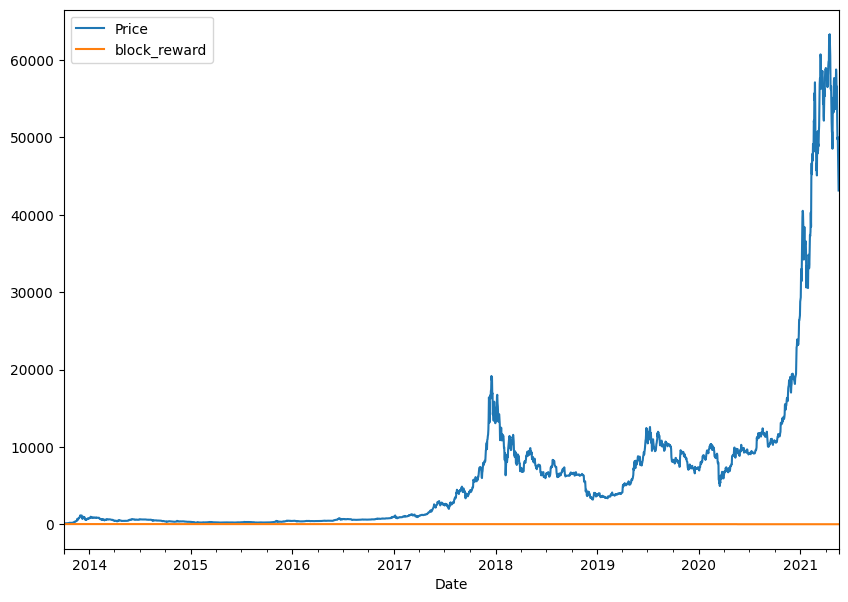

In [94]:
bitcoin_prices_block.plot(figsize=(10,7))

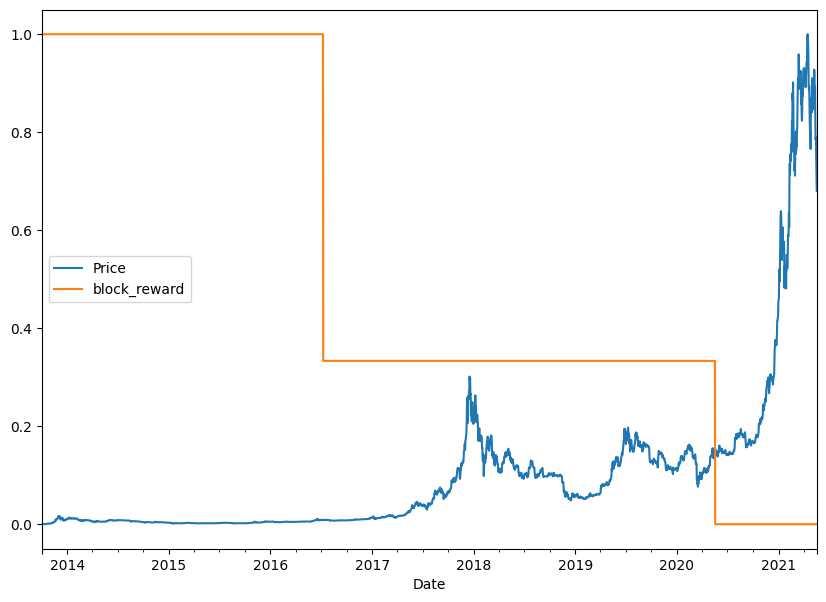

In [95]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas


In [96]:
# Setup dataset hyperparameters 
HORIZON = 1
WINDOW_SIZE = 7

In [97]:
# Make a copy of the bitcoin historical data with block reward feature 
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns 
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods = i + 1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is created a way to window our dataset directly from a pandas dataframe 

In [98]:
# Create X (windows) and Y (horizons) feature 
X = bitcoin_prices_windowed.dropna().drop('Price',axis =1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [99]:
#  Make train and test sets using indexing 
split_size = int(len(X)*0.8)

X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]



len(X_train),len(y_train),len(X_test),len(y_test)


(2224, 2224, 556, 556)

## Model 6: Dense (Multivariate time series)

In [100]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([ # type: ignore
    layers.Dense(128,activation = 'relu'),
    # layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON),
],name = 'model_6_Dense_multivariate')

# Compile 

model_6.compile(loss='mae',
                optimizer =tf.keras.optimizers.Adam()) # type: ignore

# Fit 
model_6.fit(X_train,
            y_train,
            epochs =100,
            batch_size = 128,
            verbose = 1,
            validation_data = (X_test,y_test),
            callbacks =[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
14/18 [======================>.......] - ETA: 0s - loss: 3258.8528INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 50ms/step - loss: 2970.5801 - val_loss: 7460.8208
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 491.7409INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 476.4420 - val_loss: 1675.4945
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 229.7768INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 224.4810 - val_loss: 1063.4951
Epoch 4/100
 9/18 [==============>...............] - ETA: 0s - loss: 209.0636INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 191.7272 - val_loss: 1008.2737
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 188.1635INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 177.7504 - val_loss: 974.5799
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 173.7695INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 174.6114 - val_loss: 967.5138
Epoch 7/100
10/18 [===============>..............] - ETA: 0s - loss: 184.2369INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 168.2754 - val_loss: 936.0661
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 163.7337INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 163.7337 - val_loss: 900.1133
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 158.9672 - val_loss: 913.9806
Epoch 10/100
 9/18 [==============>...............] - ETA: 0s - loss: 151.7608INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 157.1354 - val_loss: 867.7374
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 156.5422INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 155.4151 - val_loss: 852.4487
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 151.3698 - val_loss: 893.6125
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 148.7966INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 149.9287 - val_loss: 832.7721
Epoch 14/100
14/18 [======================>.......] - ETA: 0s - loss: 147.5928INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 146.3964 - val_loss: 811.9339
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 141.7117INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 145.3229 - val_loss: 805.3434
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 140.5833INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 142.5064 - val_loss: 803.2718
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 142.8772INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 47ms/step - loss: 143.4173 - val_loss: 773.7237
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 139.1049 - val_loss: 773.8480
Epoch 19/100
13/18 [====================>.........] - ETA: 0s - loss: 141.9908INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 32ms/step - loss: 137.5797 - val_loss: 766.4459
Epoch 20/100
18/18 [==============================] - 0s 10ms/step - loss: 138.3680 - val_loss: 813.5568
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 145.1484INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 138.6147 - val_loss: 734.1562
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 146.3300INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 134.6347 - val_loss: 730.2499
Epoch 23/100
14/18 [======================>.......] - ETA: 0s - loss: 131.5729INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 132.3023 - val_loss: 721.6812
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 133.7307INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 39ms/step - loss: 132.0727 - val_loss: 716.6432
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 139.3703INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 130.2845 - val_loss: 704.7046
Epoch 26/100
18/18 [==============================] - 0s 9ms/step - loss: 133.9355 - val_loss: 752.9137
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 135.4658INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 134.3742 - val_loss: 692.7308
Epoch 28/100
10/18 [===============>..............] - ETA: 0s - loss: 134.0171INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 127.7992 - val_loss: 686.4832
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 126.9006INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 126.9006 - val_loss: 680.2065
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 129.1774 - val_loss: 697.1564
Epoch 31/100
18/18 [==============================] - 0s 10ms/step - loss: 132.6838 - val_loss: 764.9514
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 131.8260INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 33ms/step - loss: 133.1515 - val_loss: 666.3853
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 131.5010 - val_loss: 700.8701
Epoch 34/100
18/18 [==============================] - 0s 7ms/step - loss: 125.1530 - val_loss: 667.0238
Epoch 35/100
12/18 [===================>..........] - ETA: 0s - loss: 125.9827INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 123.2570 - val_loss: 656.0961
Epoch 36/100
18/18 [==============================] - 0s 8ms/step - loss: 130.0758 - val_loss: 706.6680
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 125.2570INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 125.6043 - val_loss: 647.8217
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 124.9327INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 122.4288 - val_loss: 645.5930
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 123.3924INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 121.2003 - val_loss: 641.5435
Epoch 40/100
18/18 [==============================] - 0s 11ms/step - loss: 120.4639 - val_loss: 647.9156
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 124.1445INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 122.2217 - val_loss: 638.2645
Epoch 42/100
11/18 [=================>............] - ETA: 0s - loss: 128.9958INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 125.7268 - val_loss: 637.9866
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 120.5473 - val_loss: 638.4308
Epoch 44/100
18/18 [==============================] - 0s 10ms/step - loss: 120.3591 - val_loss: 664.1160
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 119.8129INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 120.9288 - val_loss: 627.3643
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 118.2815INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 118.2815 - val_loss: 623.4172
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 121.4799 - val_loss: 650.1857
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 117.6837 - val_loss: 662.7881
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 118.2880INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 45ms/step - loss: 118.2906 - val_loss: 620.8547
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 118.1040 - val_loss: 633.8220
Epoch 51/100
18/18 [==============================] - 0s 11ms/step - loss: 116.2889 - val_loss: 641.0673
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 117.3309 - val_loss: 627.8610
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 119.0094INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 119.1377 - val_loss: 610.5799
Epoch 54/100
18/18 [==============================] - 0s 8ms/step - loss: 116.2348 - val_loss: 627.1746
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 120.5916INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 115.6663 - val_loss: 606.1550
Epoch 56/100
18/18 [==============================] - 0s 11ms/step - loss: 115.7455 - val_loss: 755.1146
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 132.7566 - val_loss: 622.6525
Epoch 58/100
18/18 [==============================] - 0s 10ms/step - loss: 120.2140 - val_loss: 622.8696
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 113.7624 - val_loss: 620.0791
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 115.6729 - val_loss: 609.2104
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4976 - val_loss: 629.6013
Epoch 62/100
12/18 [===================>..........] - ETA: 0s - loss: 112.7854INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 113.0248 - val_loss: 597.2985
Epoch 63/100
18/18 [==============================] - 0s 11ms/step - loss: 113.6068 - val_loss: 600.1417
Epoch 64/100
18/18 [==============================] - 0s 14ms/step - loss: 113.4317 - val_loss: 649.8471
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 118.0583 - val_loss: 616.2661
Epoch 66/100
13/18 [====================>.........] - ETA: 0s - loss: 111.7141INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 34ms/step - loss: 113.2934 - val_loss: 591.3201
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0285 - val_loss: 674.7615
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 121.9123 - val_loss: 694.2901
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 123.8752 - val_loss: 668.3487
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 121.1392 - val_loss: 600.9326
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 112.8752 - val_loss: 606.5657
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 113.0114 - val_loss: 592.8920
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 112.7935 - val_loss: 648.3594
Epoch 74/100
15/18 [========================>.....] - ETA: 0s - loss: 110.9610INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 111.5148 - val_loss: 586.1272
Epoch 75/100
18/18 [==============================] - 0s 8ms/step - loss: 110.6566 - val_loss: 591.8741
Epoch 76/100
10/18 [===============>..............] - ETA: 0s - loss: 114.7867INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 111.7566 - val_loss: 585.1006
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 111.3780INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 110.5692 - val_loss: 580.5825
Epoch 78/100
18/18 [==============================] - 0s 8ms/step - loss: 111.8832 - val_loss: 588.8359
Epoch 79/100
18/18 [==============================] - 0s 10ms/step - loss: 109.8784 - val_loss: 590.4795
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 109.9909 - val_loss: 588.1002
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 110.5952INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 110.5952 - val_loss: 578.8409
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 115.1563INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 38ms/step - loss: 115.1563 - val_loss: 578.7232
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 112.6402 - val_loss: 684.4716
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5469 - val_loss: 580.8237
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 109.5137 - val_loss: 598.1729
Epoch 86/100
18/18 [==============================] - 0s 9ms/step - loss: 111.4227 - val_loss: 615.4074
Epoch 87/100
18/18 [==============================] - 0s 8ms/step - loss: 111.6895 - val_loss: 579.4251
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 110.9422 - val_loss: 598.6442
Epoch 89/100
12/18 [===================>..........] - ETA: 0s - loss: 104.0862INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 36ms/step - loss: 111.1922 - val_loss: 578.6456
Epoch 90/100
18/18 [==============================] - 0s 13ms/step - loss: 108.7042 - val_loss: 667.2047
Epoch 91/100
18/18 [==============================] - 0s 10ms/step - loss: 112.2375 - val_loss: 619.6693
Epoch 92/100
18/18 [==============================] - ETA: 0s - loss: 110.6437INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 35ms/step - loss: 110.6437 - val_loss: 575.1477
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 113.8837 - val_loss: 594.0583
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9795 - val_loss: 599.5329
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0605 - val_loss: 584.1786
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 115.4239 - val_loss: 586.0999
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0406 - val_loss: 627.4684
Epoch 98/100
14/18 [======================>.......] - ETA: 0s - loss: 112.0077INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 40ms/step - loss: 109.7408 - val_loss: 570.3342
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 107.2398INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


INFO:tensorflow:Assets written to: model_experiments\model_6_Dense_multivariate\assets


18/18 [==============================] - 1s 37ms/step - loss: 109.0819 - val_loss: 570.0475
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 113.9108 - val_loss: 636.2033


In [101]:
# Evaluate multivariate model 
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 5ms/step - loss: 636.2032


636.2032470703125

In [102]:
# Load in and evaluate best performing model 
model_6 = tf.keras.models.load_model('model_experiments/model_6_Dense_multivariate') # type: ignore
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 570.0475


570.0475463867188

In [103]:
# Make predictions with multivariate model 
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8880.294, 8800.612, 8991.573, 8784.938, 8778.797, 8730.007,
       8655.277, 8572.744, 8451.111, 8517.623], dtype=float32)>

In [104]:
# Evaluate predictions to get eval metrics 
model_6_results = evaluate_preds(y_pred=model_6_preds,y_true=y_test)
model_6_results


{'mae': 570.04755,
 'mape': 2.555077,
 'mase': 1.0014156,
 'mse': 1177370.8,
 'rmse': 1085.0671}

In [105]:
# Create a model 
new_model_6 = tf.keras.Sequential([ # type: ignore
    layers.Dense(128,activation = 'relu'),
    # layers.Dense(64,activation ='relu'),
    # layers.Dense(32,activation ='relu'),
    # layers.Dense(16,activation ='relu'),
    # layers.Dense(8,activation ='relu'),
    # layers.Dense(4,activation ='relu'),
    # layers.Dense(2,activation ='relu'),
    layers.Dense(1,activation ='relu'),

],name = 'new_model_6')

# compile 
new_model_6.compile(loss = 'mae',optimizer = tf.keras.optimizers.Adam()) # type: ignore

# fit the model 
new_model_6.fit(X_train,
                y_train,
                epochs = 100,
                batch_size = 128,
                verbose = 1,
                validation_data = (X_test,y_test),
                callbacks = [create_model_checkpoint(model_name=new_model_6.name)]
                )

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1002.1290INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 44ms/step - loss: 1002.1290 - val_loss: 2723.8762
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 290.6796INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 269.8383 - val_loss: 1038.3842
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 190.7307INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 43ms/step - loss: 189.1292 - val_loss: 928.5077
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 183.3530INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 49ms/step - loss: 171.6275 - val_loss: 896.3135
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 167.5694 - val_loss: 907.6237
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 156.3855INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 45ms/step - loss: 157.0668 - val_loss: 842.5043
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 154.1631INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 150.1364 - val_loss: 815.5380
Epoch 8/100
12/18 [===================>..........] - ETA: 0s - loss: 144.2494INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 144.7433 - val_loss: 800.6688
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 144.4355INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 144.0546 - val_loss: 774.2192
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 133.4880INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 138.0386 - val_loss: 738.4089
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 129.9666INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 130.5623 - val_loss: 734.7912
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 127.3043 - val_loss: 772.8394
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 123.6837INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 40ms/step - loss: 127.9633 - val_loss: 713.4286
Epoch 14/100
10/18 [===============>..............] - ETA: 0s - loss: 122.4683INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 122.5200 - val_loss: 661.6996
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 126.1448INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 42ms/step - loss: 124.6645 - val_loss: 653.0646
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 116.6976INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 41ms/step - loss: 117.7827 - val_loss: 647.1464
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 117.9851 - val_loss: 656.1848
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 115.2095INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 115.2095 - val_loss: 615.0294
Epoch 19/100
18/18 [==============================] - 0s 13ms/step - loss: 115.1367 - val_loss: 721.6761
Epoch 20/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.1741INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 37ms/step - loss: 115.6799 - val_loss: 605.2900
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 118.1839INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 116.3175 - val_loss: 603.4481
Epoch 22/100
18/18 [==============================] - 0s 9ms/step - loss: 114.9117 - val_loss: 632.1635
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 115.5381INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 39ms/step - loss: 115.2359 - val_loss: 591.7160
Epoch 24/100
18/18 [==============================] - 0s 12ms/step - loss: 111.9076 - val_loss: 595.2864
Epoch 25/100
18/18 [==============================] - 0s 11ms/step - loss: 110.1009 - val_loss: 592.9061
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 112.1188INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 40ms/step - loss: 112.1188 - val_loss: 584.6278
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 116.1394INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 36ms/step - loss: 114.0231 - val_loss: 582.5658
Epoch 28/100
18/18 [==============================] - 0s 12ms/step - loss: 109.9807 - val_loss: 590.6131
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 109.2490 - val_loss: 603.9048
Epoch 30/100
10/18 [===============>..............] - ETA: 0s - loss: 108.3343INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 113.9296 - val_loss: 577.8005
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 112.4306 - val_loss: 601.4850
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 111.0696 - val_loss: 588.8609
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 109.5162 - val_loss: 610.5446
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2796 - val_loss: 581.4161
Epoch 35/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3402 - val_loss: 603.1198
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 110.8377INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 33ms/step - loss: 112.7049 - val_loss: 573.6360
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 108.4148 - val_loss: 597.6127
Epoch 38/100
18/18 [==============================] - 0s 11ms/step - loss: 111.4628 - val_loss: 616.5068
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 109.0573 - val_loss: 575.4200
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 110.5738INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 48ms/step - loss: 107.5302 - val_loss: 571.3739
Epoch 41/100
18/18 [==============================] - 0s 11ms/step - loss: 107.3459 - val_loss: 623.7509
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 111.8456 - val_loss: 626.8208
Epoch 43/100
18/18 [==============================] - 0s 11ms/step - loss: 112.0293 - val_loss: 670.5449
Epoch 44/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7599 - val_loss: 603.2674
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 109.7381 - val_loss: 598.8132
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 108.6095 - val_loss: 620.9872
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5462 - val_loss: 581.4534
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 108.5506 - val_loss: 606.3012
Epoch 49/100
13/18 [====================>.........] - ETA: 0s - loss: 116.

INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 35ms/step - loss: 113.0836 - val_loss: 566.6797
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 111.8521 - val_loss: 641.2256
Epoch 51/100
18/18 [==============================] - 0s 8ms/step - loss: 110.9754 - val_loss: 596.9478
Epoch 52/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8671 - val_loss: 575.2742
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 109.9254 - val_loss: 666.8012
Epoch 54/100
18/18 [==============================] - 0s 9ms/step - loss: 113.9573 - val_loss: 568.2546
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 113.1563 - val_loss: 566.9855
Epoch 56/100
18/18 [==============================] - 0s 10ms/step - loss: 110.2545 - val_loss: 751.6867
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 125.7358 - val_loss: 692.5240
Epoch 58/100
18/18 [==============================] - 0s 9ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 38ms/step - loss: 120.8980 - val_loss: 565.2769
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 131.8734 - val_loss: 570.2135
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 112.3192 - val_loss: 599.9796
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 107.1050 - val_loss: 570.4617
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 107.6516 - val_loss: 576.6882
Epoch 74/100
12/18 [===================>..........] - ETA: 0s - loss: 108.6384INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 36ms/step - loss: 106.6320 - val_loss: 564.8993
Epoch 75/100
18/18 [==============================] - 0s 18ms/step - loss: 106.4349 - val_loss: 595.1236
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 109.1100INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


INFO:tensorflow:Assets written to: model_experiments\new_model_6\assets


18/18 [==============================] - 1s 34ms/step - loss: 108.0417 - val_loss: 562.1569
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 106.7981 - val_loss: 585.6912
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 107.1752 - val_loss: 585.5085
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 106.1310 - val_loss: 593.3409
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8479 - val_loss: 570.2375
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 105.3272 - val_loss: 564.8940
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 113.8296 - val_loss: 591.0193
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1593 - val_loss: 627.9810
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 112.4544 - val_loss: 577.7579
Epoch 85/100
18/18 [==============================] - 0s 7ms/step - loss: 1

In [106]:
new_model_6.evaluate(X_test,y_test)


18/18 [==============================] - 0s 3ms/step - loss: 666.0156


666.015625

In [107]:
# Load in and evaluate best performing model 
new_model_6 = tf.keras.models.load_model('model_experiments/new_model_6') # type: ignore
new_model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 562.1569


562.1569213867188

In [108]:
# Make predictions with multivariate model 
new_model_6_preds = tf.squeeze(new_model_6.predict(X_test))
new_model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.527 , 8759.653 , 8995.212 , 8754.2705, 8738.301 , 8709.487 ,
       8648.725 , 8527.763 , 8426.233 , 8506.866 ], dtype=float32)>

In [109]:
# Evaluate predictions to get eval metrics 
new_model_6_results = evaluate_preds(y_pred=new_model_6_preds,y_true=y_test)
new_model_6_results

{'mae': 562.1569,
 'mape': 2.5241988,
 'mase': 0.987554,
 'mse': 1156882.4,
 'rmse': 1075.5847}

## Model 7: N-Beats algorithm 

In [110]:
print(quotes.quran_ayats())
print(quotes.random_qoutes())

('Quran : ', 'And He is the Forgiving, the Loving, (Quran 85:14)')
('Quote : ', 'Make it work, make it right, make it fast.')


### Building and testing the Nbeats block layer
Inspiration from this [blog post](https://ai.plainenglish.io/n-beats-tensorflow-powered-exploration-and-deployment-for-bitcoin-data-2963c8cbd4bb)

In [111]:
# Create  NBeatsBlock custom layer 
# class NBeatsBlock(tf.keras.layers.Layer):           #type: ignore

#       def __init__(self,input_size:int ,theta_size:int,horizon:int,n_neurons:int,n_layers:int,**Kwargs):
#             super().__init__(**Kwargs)
#             self.input_size = input_size
#             self.theta_size = theta_size
#             self.horizon = horizon
#             self.n_neurons = n_neurons
#             self.n_layers = n_layers

#             # Block contains stack of 4 fully connected layers each has Relu activation
#             self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu')for _ in range(n_layers)] # type: ignore
            
#             # Output of block is a theta with linear activation 
#             self.theta_layer = tf.keras.layers.Dense(theta_size,activation = 'linear', name = 'theta') # type: ignore
        


#       def call(self,inputs): 
#             x = inputs
#             for layer in self.hidden:
#                   x = layer(x)
#             theta = self.theta_layer(x)
#             # Output the backcast and the foreast from theta 
#             backcast,forecast = theta[:self.input_size],theta[:,-self.horizon:]
#             return backcast,forecast
      
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size: int, theta_size: int, horizon: int, n_neurons: int, n_layers: int, **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        # Block contains stack of 4 fully connected layers each has Relu activation
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        # Output of block is a theta with linear activation
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # Output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast


Lets test our NBeatsBlock class 

we will use dummy inputs and outputs

In [112]:
# set up dummy inputs and outputs for NBeatsBlock class
dummy_nbeats_blocks_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                        theta_size=WINDOW_SIZE+HORIZON,
                                        horizon=HORIZON,
                                        n_neurons=128,
                                        n_layers=4)

In [113]:
# Create dummy inputs 
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1 , axis = 0)
dummy_inputs 

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [114]:
# pass dummy inputs to dummy NBeatsLayer
backcast,forecast = dummy_nbeats_blocks_layer(dummy_inputs)

print(f'Backcast:{tf.squeeze(backcast.numpy())}')
print(f'Forecast:{tf.squeeze(forecast.numpy())}')

Backcast:[ 0.0783785  -0.33786598 -0.30763462 -0.08572674 -0.9874255  -0.1234607
 -0.4798006 ]
Forecast:0.5832678079605103


## Preparing data for the N-BEATS algorithm using tf.data

In [115]:
HORIZON = 1
WINDOW_SIZE = 7 

In [116]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
# Add windowed columns 
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i + 1}'] = bitcoin_prices_nbeats['Price'].shift(periods = i + 1)

bitcoin_prices_nbeats.head(10)

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [118]:
# Make features and labels 
X = bitcoin_prices_nbeats.dropna().drop('Price',axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets 
split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [119]:

# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm 

In [120]:

# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections  

before we can craft our N-BEATS model , we need two layers for the residual connections (subtract and add)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture 

In [121]:
# make Tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# subtract 
subtracted = layers.subtract([tensor_1,tensor_2])

# add 
added = layers.add([tensor_1,tensor_2])

# Get outputs
print(f'Inputs Tensors: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Inputs Tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using NBEATSBLOCK 
2. Create an input layer for the N-BEATS stack 
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers 
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers 
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss and Adam optimmizer with default setting as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epohs and sine its fitting for so many epochs , we'll use a couple of callbacks :
    * Early Stopping 
    * Reduce LR 


In [122]:
%%time 
tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlocks 
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size = THETA_SIZE,
                                horizon = HORIZON,
                                n_neurons =N_NEURONS,
                                n_layers = N_LAYERS,
                                name='InitialBlock')
 
# 2. Create input to stack 
stack_input = layers.Input(shape=(INPUT_SIZE),name='stack_input')

# 3. Create initial backcast and forecast input 
residuals,forecast = nbeats_block_layer(stack_input)

# 4. create stacks of block layers
for i,_ in enumerate(range(N_STACKS - 1)):

    # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast 
    backcast,block_forecast = NBeatsBlock(
        input_size = INPUT_SIZE,
        theta_size = THETA_SIZE,
        horizon= HORIZON,
        n_neurons = N_NEURONS,
        n_layers = N_LAYERS,
        name = f'NBeatsBlock_{i}'
    )(residuals)

    # 6. Create the double residuals stacking 
    residuals = layers.subtract([residuals,backcast],name = f'subtract_{i}') 
    forecast = layers.add([forecast,block_forecast],name = f'add_{i}')

# 7. Put the stack model together 
model_7 = tf.keras.Model(inputs=stack_input,outputs=forecast,name='model_7_NBEATS')

# 8. Compile model with MAE loss 
model_7.compile(loss ='mae',optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data = test_dataset,
            verbose =0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200,restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                patience =100,
                                                verbose =1)])



Epoch 816: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1325: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1425: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: total: 1min 30s
Wall time: 5min 52s


In [123]:
# Evaluate N-Beats mdoel on the test dataset 
model_7.evaluate(test_dataset) # type: ignore

1/1 [==============================] - 0s 26ms/step - loss: 570.5604


570.5603637695312

In [124]:
# make predictions with N-BEATS model 
model_7_preds = make_preds(model_7,test_dataset) # type: ignore
model_7_preds[:10]

1/1 [==============================] - 1s 821ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8818.301, 8759.095, 9043.487, 8757.103, 8740.299, 8759.435,
       8656.278, 8481.325, 8476.097, 8509.594], dtype=float32)>

In [125]:
# Evaluate N-BEATS model preds\
model_7_results = evaluate_preds(y_true=y_test,y_pred = model_7_preds)
model_7_results

{'mae': 570.56036,
 'mape': 2.5606487,
 'mase': 1.0023166,
 'mse': 1160992.0,
 'rmse': 1077.4934}

In [126]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957013,
 'mse': 1147547.1,
 'rmse': 1071.2362}

In [127]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.__version__

Num GPUs Available:  1


'2.10.0'

### Plotting the N-BEATS architecture we've created 

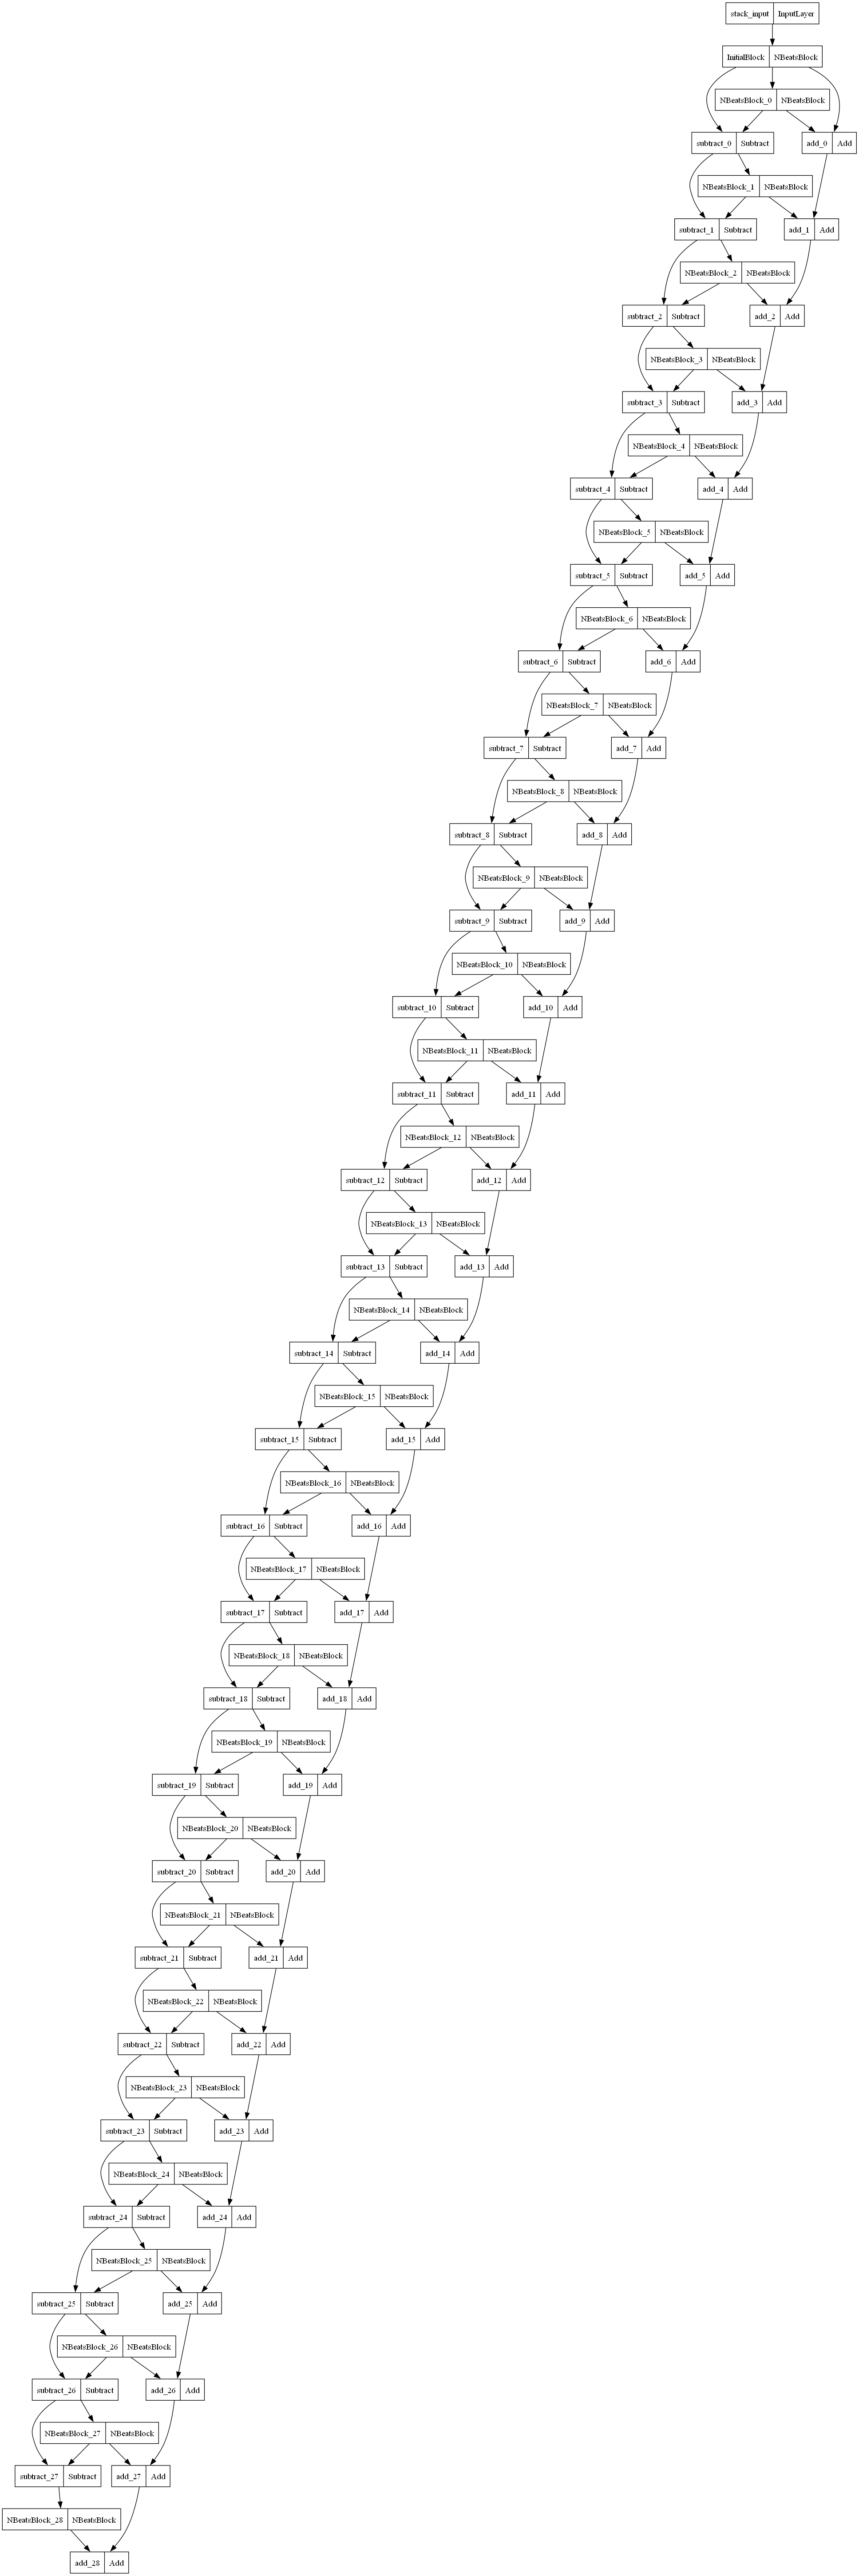

In [128]:
# Plot the N-BEATS model and inspect the architecture 
from tensorflow.keras.utils import plot_model # type: ignore

plot_model(model_7) # type: ignore

## Model 8: Ensemble model

An ensemble leverages the wisdom of the crowd effect 

it combines many different to predict a common goal 

In [129]:
HORIZON,WINDOW_SIZE

(1, 7)

### Constructing and fitting and ensemble of models

In [130]:
def get_ensemble_models(horizon = HORIZON,train_data = train_dataset,test_data = test_dataset,num_iter = 10,num_epochs = 1000,loss_fns =['mae','mse','mape']):
    """
        Returns a list of num_iter models each trained on MAE , MSE,and MAPE loss.
    """
    # Make empty list for trained ensemble models 
    ensemble_models =[]

    # Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f'Optimizing model by reducing: {loss_function} for {num_epochs} epochs,model number: {i}')

            # Construct a simple model 
            model = tf.keras.Sequential([
                layers.Dense(128,kernel_initializer = 'he_normal',activation='relu'),
                layers.Dense(128,kernel_initializer = 'he_normal',activation='relu'),
                layers.Dense(HORIZON)
            ])
            # Compile a simple model with current loss function 
            model.compile(loss= loss_function,optimizer=tf.keras.optimizers.Adam(),metrics= ['mae','mse'])

            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose =0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                                                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                                                       patience=100,
                                                                                                       verbose=1)])
            # Append fitted model to list of ensemble models
            ensemble_models.append(model) # type: ignore
    return ensemble_models


In [131]:
%%time 
# Get list of trained ensemble models 
ensemble_models = get_ensemble_models(num_iter=5,num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs,model number: 0
Optimizing model by reducing: mse for 1000 epochs,model number: 0

Epoch 336: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 436: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs,model number: 0

Epoch 158: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 605: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 705: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs,model number: 1

Epoch 380: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 594: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 694: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs,model number: 1

Epoch 402: ReduceLROnPlateau

In [132]:
len(ensemble_models) # type: ignore

15

In [133]:
ensemble_models # type: ignore

### Make Predictions with our ensemble model 

In [134]:
def make_ensemble_preds(ensemble_models,data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [135]:
%%time 
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step
CPU times: total: 78.1 ms
Wall time: 625 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8815.373,  8821.503,  9105.233, ..., 50057.41 , 48985.965,
        46449.73 ],
       [ 8801.015,  8842.662,  9062.468, ..., 49588.22 , 48315.383,
        46488.72 ],
       [ 8815.854,  8792.626,  8992.835, ..., 50015.57 , 47598.254,
        46114.12 ],
       ...,
       [ 8676.473,  8624.897,  9023.14 , ..., 49680.69 , 48811.457,
        45018.344],
       [ 8747.347,  8743.765,  9012.013, ..., 49772.65 , 48334.59 ,
        45989.89 ],
       [ 8827.793,  8777.562,  9048.31 , ..., 50090.004, 48304.066,
        45771.016]], dtype=float32)>

In [136]:
# Evaluate ensemble model predictions 
ensemble_results = evaluate_preds(y_true=y_test,y_pred=ensemble_preds) # type: ignore
ensemble_results

{'mae': 582.828,
 'mape': 2.6559067,
 'mase': 1.0238675,
 'mse': 1187278.9,
 'rmse': 1089.5494}

In [137]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0) # type: ignore
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8783.776 , 8771.736 , 9061.7705, 8729.767 , 8739.223 , 8728.777 ,
       8658.2705, 8469.175 , 8464.486 , 8521.925 ], dtype=float32)>

In [138]:
ensemble_median = np.median(ensemble_preds,axis=0) # type: ignore
ensemble_median[:10]

array([8800.549, 8777.562, 9064.176, 8722.928, 8743.076, 8729.805,
       8663.755, 8480.166, 8461.293, 8530.346], dtype=float32)

In [139]:
ensemble_results = evaluate_preds(y_true=y_test,y_pred=ensemble_mean) # type: ignore
ensemble_results

{'mae': 571.08246,
 'mape': 2.5854254,
 'mase': 1.0032337,
 'mse': 1153531.8,
 'rmse': 1074.026}

In [140]:
ensemble_results = evaluate_preds(y_true=y_test,y_pred=ensemble_median) # type: ignore
ensemble_results

{'mae': 570.6201,
 'mape': 2.5738864,
 'mase': 1.0024215,
 'mse': 1154933.0,
 'rmse': 1074.6781}

### Plotting the predictions intervals of our ensemble 

In [141]:
# Find upper and lower bounds of ensemble predictions 
def get_upper_lower(preds): # 1.Take the predictions from a number of randomly initialized 

    # 2.Measure the standard deviation of the predictions 
    std = tf.math.reduce_std(preds,axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96  * std 

    # 4. Get the prediction interval upper and lower bounds 
    preds_mean = tf.reduce_mean(preds,axis=0)
    lower,upper = preds_mean - interval,preds_mean + interval

    return lower , upper

In [142]:
# get the upper and lower bounds of the 95% percent prediction interval 
lower,upper = get_upper_lower(preds=ensemble_preds) # type: ignore
lower,upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8706.762 ,  8671.779 ,  8993.42  ,  8632.883 ,  8641.903 ,
         8669.527 ,  8595.658 ,  8381.185 ,  8402.897 ,  8463.576 ,
         8133.59  ,  8023.994 ,  7997.1064,  7550.8984,  7192.105 ,
         7217.614 ,  6996.8794,  7146.647 ,  7062.901 ,  7450.844 ,
         7298.6025,  7648.9146,  7444.4287,  7296.218 ,  7221.388 ,
         7257.462 ,  7121.7007,  7331.1914,  7474.7334,  7490.0625,
         7477.147 ,  7259.616 ,  7156.3364,  7123.902 ,  7131.579 ,
         7178.028 ,  7038.0273,  7043.7285,  6821.456 ,  6508.0796,
         7244.758 ,  7042.267 ,  7002.4443,  7154.6147,  7162.3345,
         7074.6074,  7177.441 ,  7163.121 ,  7107.8086,  7164.8086,
         7264.388 ,  7335.7285,  7192.079 ,  7098.5713,  7100.4795,
         6890.619 ,  7203.945 ,  7281.8257,  7294.133 ,  7638.2817,
         7975.7427,  8054.6567,  7747.165 ,  8024.128 ,  8028.3135,
         8080.8975,  8025.813 ,  8657.502 ,  8831.314 ,  8684.584 ,

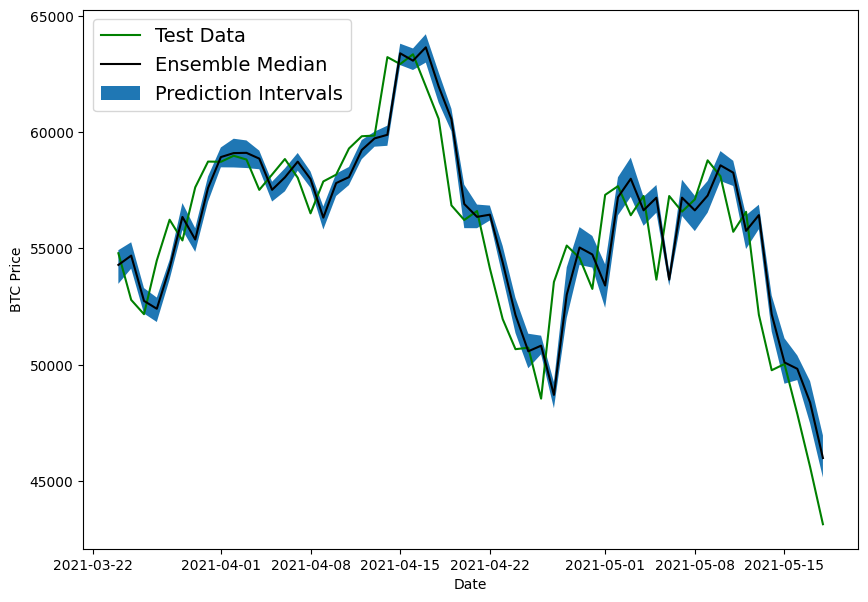

In [143]:
# Get the median/mean values of our ensemble preds 
ensemble_median = np.median(ensemble_preds,axis=0)
ensemble_mean = np.mean(ensemble_preds,axis=0)

# plot the median of our ensemble preds along with predictions intervals 
offset =500 
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],'g',label ='Test Data')
plt.plot(X_test.index[offset:],ensemble_median[offset:],'black',label ='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
# To plot the upper and lower bounds , let's use fill_between 
plt.fill_between(X_test.index[offset:],(lower)[offset:],(upper)[offset:],label ='Prediction Intervals')
plt.legend(loc ='upper left',fontsize=14)

## Aside: two types of uncertainty 

Uncertainty estimates in machine learning seek out to qualitatively and quantitaively answer the questions:
1. What can my model Know?
2. What doesn't my model know? 


There are two major types of uncertainty in mahine learning you should know about :
* **Aleatoric uncertainty** - this type of uncertainty annot be reduced and it is often referred as data uncertainty or subway uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced , it also referred to as model or coconut uncertainty 

## Model 9: Train a model on the full historical data to make predictions into the future

so far all our models have predicted on test the test dataset however , this is only pseudoFuture.

Lets now build a model which is capable of predicting into the future


In [144]:
# Train model on entire data to make predictions for the next day 
X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'],axis=1).to_numpy()

# Get labels 
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all),len(y_all)


(2780, 2780)

In [145]:
# Turn data into efficient running tensors 

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine feature nd labels 
dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

# Batch and prefetch for optimal performance 
BATCH_SIZE =1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [146]:
tf.random.set_seed(42)

# Create a model 
model_9 = tf.keras.Sequential([
    layers.Dense(128,activation ='relu'),
    layers.Dense(128,activation ='relu'),
    layers.Dense(HORIZON)
],name = 'model_9_future_model')
# Compile 
model_9.compile(loss =tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())

# Fit the model 
model_9.fit(dataset_all,
            epochs=100,
            # callbacks = [create_model_checkpoint(model_name=model_9.name)] 
            )

Epoch 1/100
3/3 [==============================] - 0s 11ms/step - loss: 6814.2886
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 4335.6816
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1844.7214
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 757.1260
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1350.4764
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 903.4728
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 429.3319
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 672.7672
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 527.6671
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 410.3040
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 503.9915
Epoch 12/100
3/3 [==============================] - 0s 5ms/step - loss: 383.7827
Epoch 13/100
3/3 [==============

### Make predicitons into future 

In [147]:
# How many timesteps to predict into the future 
INTO_FUTURE = 14

To make predictions into the future we wnt a function whic :
1. Takes as input :
    * a list of values 
    * a trained model
    * a window into the future to predict 
    * the windows size cn only predit on the same kind of data it was trained on 
2. Creates an empty list for future forecasts 

3. Loop INTO_FUTURE making a prediction on WINDOW_SIZE sequences which update to remove the first value and append the latest prediction


In [175]:
# 1. Create function to make predicitons inot the future 

def make_future_forecast(values,model,into_future,window_size = WINDOW_SIZE)-> list: # type: ignore
    """
    Make Future forecasts as a list of floats 
    """
    # 2. Create an empty list for future forecasts/prepare data to forecast on 
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each 
    for _ in range(into_future):
        # Predict on the last window then append it again , again 
        future_pred = model.predict(tf.expand_dims(last_window,axis=0))
        print(f'Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n')

        # Append predictions to future_forecast 
        future_forecast.append(tf.squeeze(future_pred).numpy())

        # update last window with new pred and get WINDOW_SIZE recent preds 
        last_window = np.append(last_window,future_pred)[-WINDOW_SIZE:]

    return future_forecast

In [181]:
# # Make forecast into the fututre
future_forecast = make_future_forecast(values=y_all,model=model_9,into_future=INTO_FUTURE,window_size=WINDOW_SIZE)


# # Make forecasts into future of the price of Bitcoin
# # Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# # we're making may not actually be forecasts, if that's the case, readjust the training data.
# future_forecast = make_future_forecast(values=y_all,
#                                        model=model_9,
#                                        into_future=INTO_FUTURE,
#                                        window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 16ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54554.96875

1/1 [==============================] - 0s 20ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54554.96875   ] -> Prediction: 51262.83984375

1/1 [==============================] - 0s 17ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54554.96875    51262.83984375] -> Prediction: 48124.12890625

1/1 [==============================] - 0s 18ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54554.96875    51262.83984375 48124.12890625] -> Prediction: 47939.94921875

1/1 [==============================] - 0s 19ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 54554.96875
 51262.83984375 48124.12890625 47939.94921875] ->

### Plot Future forecasts 

In [182]:
future_forecast[:10]

[54554.97,
 51262.84,
 48124.13,
 47939.95,
 45879.504,
 46752.934,
 49302.496,
 52253.746,
 49002.785,
 46756.074]

In [161]:


def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [157]:
# Last timestep of timesteps 
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [158]:
type(last_timestep)

pandas._libs.tslibs.timestamps.Timestamp

In [162]:
# Get next two weeks of timesteps 
next_time_steps = get_future_dates(start_date =last_timestep,into_future =INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [184]:
# Insert last timesteps/final Price into next time teps and future forecasts so the plot doesnt look janky 
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])
next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54554.97 , 51262.84 , 48124.13 , 47939.95 , 45879.504,
        46752.934, 49302.496, 52253.746, 49002.785, 46756.074, 46889.473,
        47013.137, 48962.496, 50324.363], dtype=float32))

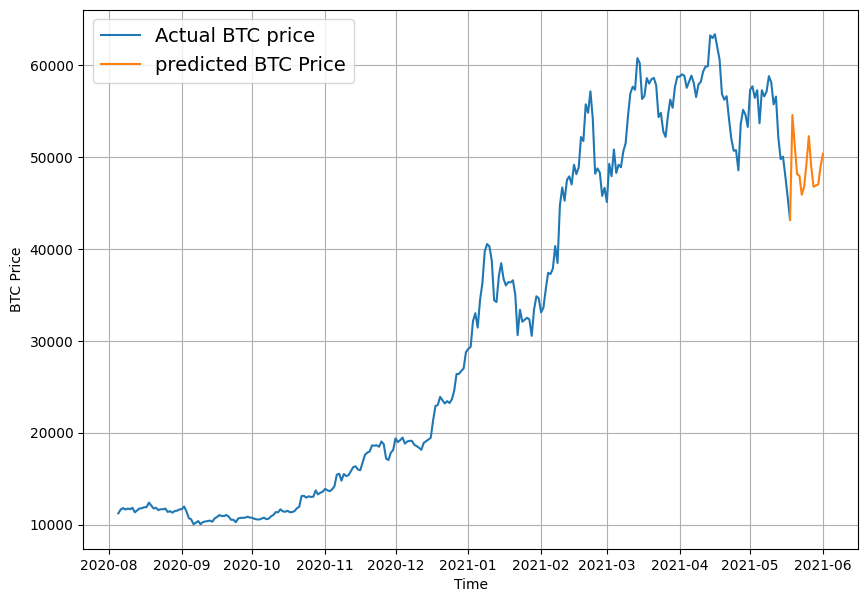

In [187]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start = 2500 , format ='-',label = 'Actual BTC price')
plot_time_series(next_time_steps,future_forecast,format ='-',label ='predicted BTC Price')

## Model 10: why  forecasting is BS 

In [197]:
# Lets introduce a turkey problem to our BTC data 
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] /100
len(btc_price_turkey)

2787

In [198]:
# Manufacture an extra price on the end 
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [199]:
# Get the timesteps for the turkey problem

btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]


array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

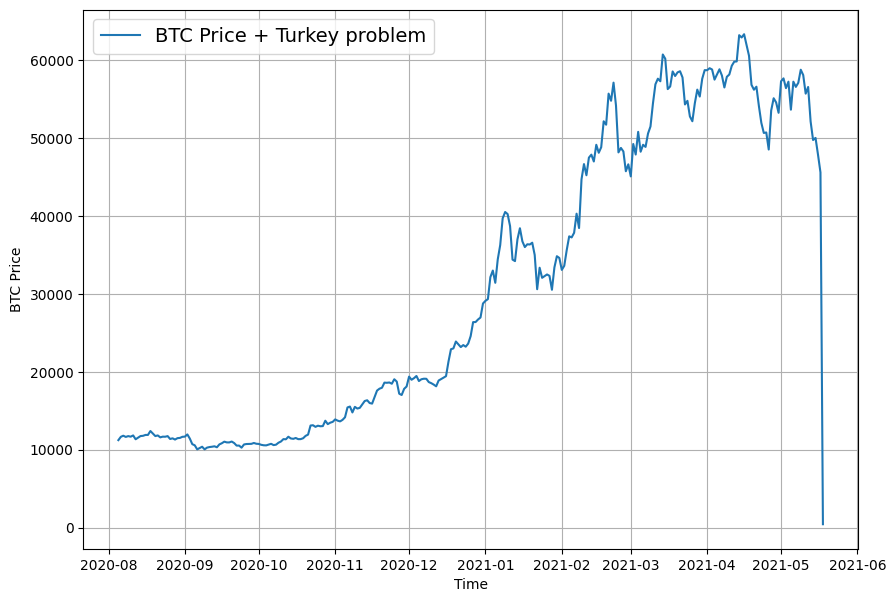

In [200]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,values=btc_price_turkey,format ='-',label='BTC Price + Turkey problem', start = 2500)

In [201]:
HORIZON = 1
WINDOW_SIZE =7

In [205]:
# Create  train and test sets for turkey problem data 
full_windows ,full_labels = make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE,horizon=HORIZON)
X_train,X_test,y_train,y_test = make_train_test_splits(full_windows,full_labels)
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

### Build a turkey model

In [208]:

# Clone  model_1 
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'model_10_turkey_model'

# Compile the model
turkey_model.compile(loss ='mae',optimizer = tf.keras.optimizers.Adam())

# fit the model 
turkey_model.fit(X_train,y_train,epochs =100,batch_size=128,validation_data=(X_test,y_test),callbacks=[create_model_checkpoint(turkey_model.name)])


Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1606.6349INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 1s 34ms/step - loss: 1575.3958 - val_loss: 1328.2827
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 358.4098 - val_loss: 1886.5111
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 251.3365INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 244.8463 - val_loss: 1308.7179
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 215.4439INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 25ms/step - loss: 215.6654 - val_loss: 1209.7172
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 207.2903INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 23ms/step - loss: 203.7902 - val_loss: 1201.3750
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 195.8337INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 196.9329 - val_loss: 1174.4154
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 194.4145INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 193.6111 - val_loss: 1134.9745
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 187.1736INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 187.1736 - val_loss: 1133.5521
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 155.9287INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 182.8933 - val_loss: 1110.4901
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 195.7990INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 1s 46ms/step - loss: 178.7556 - val_loss: 1066.1929
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 173.6410INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 173.6410 - val_loss: 1033.6639
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 171.0356 - val_loss: 1132.5233
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 167.5920INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 167.1306 - val_loss: 992.0894
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 159.7140 - val_loss: 992.9134
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 164.4279INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 156.0620 - val_loss: 965.7466
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 153.2894INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 150.7793 - val_loss: 923.9644
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 149.1004INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 149.1004 - val_loss: 905.3868
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 150.3128INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 145.7492 - val_loss: 888.2922
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 140.0495INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 140.0495 - val_loss: 862.5295
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 151.9325INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 140.6483 - val_loss: 836.4604
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 164.3025INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 140.9986 - val_loss: 833.0861
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 138.2482INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 133.5762 - val_loss: 823.7889
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 125.5127INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 25ms/step - loss: 130.6309 - val_loss: 798.8259
Epoch 24/100
 9/18 [==============>...............] - ETA: 0s - loss: 125.2242INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 25ms/step - loss: 130.0726 - val_loss: 793.2153
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 131.9635INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 128.4024 - val_loss: 776.3772
Epoch 26/100
13/18 [====================>.........] - ETA: 0s - loss: 126.5099INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 129.3546 - val_loss: 766.9310
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 128.7440INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 21ms/step - loss: 127.7344 - val_loss: 757.5861
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1148 - val_loss: 762.2416
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 126.9834 - val_loss: 792.5165
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 128.3530 - val_loss: 793.1073
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 129.0299 - val_loss: 890.8299
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 127.0253 - val_loss: 758.5612
Epoch 33/100
16/18 [=========================>....] - ETA: 0s - loss: 121.2163INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 119.8565 - val_loss: 748.0078
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 126.6710INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 23ms/step - loss: 121.6201 - val_loss: 721.1266
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 118.1512INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 118.6851 - val_loss: 718.5991
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 120.6122 - val_loss: 748.3383
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 121.4790INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 121.4790 - val_loss: 717.1624
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 106.8423INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 118.4970 - val_loss: 706.1868
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 134.8557INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 116.6436 - val_loss: 703.5208
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 115.5654INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 115.6154 - val_loss: 700.1454
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1959 - val_loss: 707.7013
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 110.3595INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 121.9936 - val_loss: 697.9494
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 115.4968 - val_loss: 698.8403
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8847 - val_loss: 708.9024
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 115.9680 - val_loss: 700.6038
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 87.9462INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 116.1417 - val_loss: 689.4933
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4017 - val_loss: 818.2312
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 115.4293 - val_loss: 689.7896
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3524 - val_loss: 726.4278
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9607 - val_loss: 735.0994
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 113.6863INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 20ms/step - loss: 113.3576 - val_loss: 681.0225
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0043 - val_loss: 686.3201
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3740 - val_loss: 681.9575
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 121.3235 - val_loss: 787.8846
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9083 - val_loss: 702.5817
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0955 - val_loss: 941.7742
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 138.4904 - val_loss: 727.6852
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.2941 - val_loss: 724.9545
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 109.1180INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 22ms/step - loss: 110.3346 - val_loss: 677.5966
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4152 - val_loss: 704.2661
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0496INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 112.5405 - val_loss: 671.1055
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2275 - val_loss: 694.7971
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7990 - val_loss: 672.3785
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0534 - val_loss: 788.0018
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8777 - val_loss: 679.3632
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 119.0529INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 112.6337 - val_loss: 670.2183
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0658 - val_loss: 684.1573
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0644 - val_loss: 772.4343
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 128.0166 - val_loss: 758.6153
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 123.0898 - val_loss: 697.9046
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6029 - val_loss: 686.2909
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 101.9338INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 1s 33ms/step - loss: 109.5876 - val_loss: 659.4666
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 110.7520INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 110.7520 - val_loss: 658.1013
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3907 - val_loss: 663.3715
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3336 - val_loss: 673.1122
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2813 - val_loss: 671.0193
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 86.2904INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 109.1306 - val_loss: 656.7422
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7992 - val_loss: 656.7781
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9806 - val_loss: 677.2802
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 118.5755INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 109.2962 - val_loss: 655.8409
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 106.9727INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 19ms/step - loss: 107.4708 - val_loss: 654.8149
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9173 - val_loss: 665.0647
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 110.5642 - val_loss: 719.7554
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 118.0874INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 18ms/step - loss: 111.3757 - val_loss: 652.7027
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7834 - val_loss: 681.9501
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9821 - val_loss: 682.1233
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.9315 - val_loss: 683.5804
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7599 - val_loss: 655.5947
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8946 - val_loss: 663.8504
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9565 - val_loss: 700.3381
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4875 - val_loss: 744.0920
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1991 - val_loss: 654.9707
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 17ms/step - loss: 107.8398 - val_loss: 650.8095
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2993 - val_loss: 692.5744
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1552 - val_loss: 682.9347
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4250 - val_loss: 657.6016
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 107.6368INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


INFO:tensorflow:Assets written to: model_experiments\model_10_turkey_model\assets


18/18 [==============================] - 0s 18ms/step - loss: 108.5413 - val_loss: 649.1364
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4756 - val_loss: 682.7924


In [209]:
# Evaluate model on test data 
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 682.7924


682.7923583984375

In [210]:
# Load best performing turkey model and evaluate on test data 
turkey_model = tf.keras.models.load_model('model_experiments/model_10_turkey_model')
turkey_model.evaluate(X_test,y_test) # type: ignore

18/18 [==============================] - 0s 3ms/step - loss: 649.1364


649.1364135742188

In [211]:
# make predicitons with turkey model 
turkey_preds = make_preds(turkey_model,X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8883.102 , 8776.776 , 9032.875 , 8786.087 , 8715.137 , 8760.072 ,
       8698.995 , 8504.1455, 8476.268 , 8528.079 ], dtype=float32)>

In [212]:
# Evaluate turkey preds 
turkey_results = evaluate_preds(y_true=y_test,y_pred=turkey_preds)
turkey_results

{'mae': 17130.363,
 'mape': 121.377495,
 'mase': 26.509298,
 'mse': 614523600.0,
 'rmse': 23717.006}

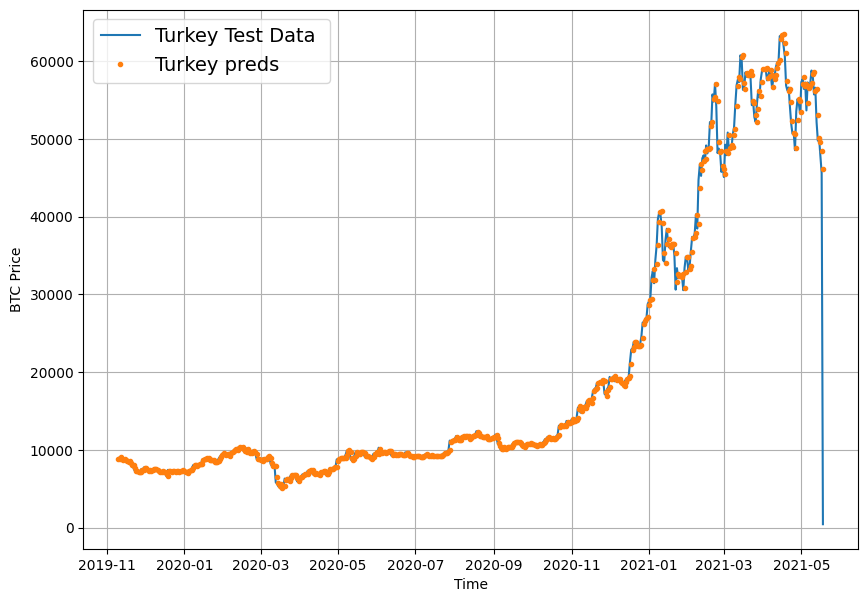

In [224]:
plt.figure(figsize=(10,7))
offset =0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format = '-',
                 label = 'Turkey Test Data ',start = offset)
# 
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds[-len(y_test):],
                 format = '.',
                 label = 'Turkey preds ',
                 start =offset)

## Compare models 

In [229]:
# Compare different model results 
model_results = pd.DataFrame({'naive_model':naive_results,
                              'model_1_Dense': model_1_results,
                              'model_2_dense_w7_h1': model_2_results,
                              'model_3_dense_w30_h7':model_3_results,
                              'model_4_CONV1D': model_4_results,
                              'model_5_LSTM':model_5_results,
                              'model_6_multivariate': model_6_results,
                              'model_7_NBEATS':model_7_results,
                              'model_8_ensemble':ensemble_results,
                              'model_10':turkey_results
                              })
model_results = model_results.transpose()
model_results.head()

,mae,mape,mase,mse,rmse
naive_model,567.980225,2.516525,0.999570,1147547.125,1071.236206
model_1_Dense,566.034241,2.527404,0.994365,1160285.000,1077.165283
model_2_dense_w7_h1,607.358704,2.727096,1.061669,1281566.625,1132.062988
model_3_dense_w30_h7,1216.100586,5.429982,2.163983,5294217.500,1400.596191
model_4_CONV1D,570.095398,2.560857,1.001500,1184601.500,1088.393921


<Axes: >

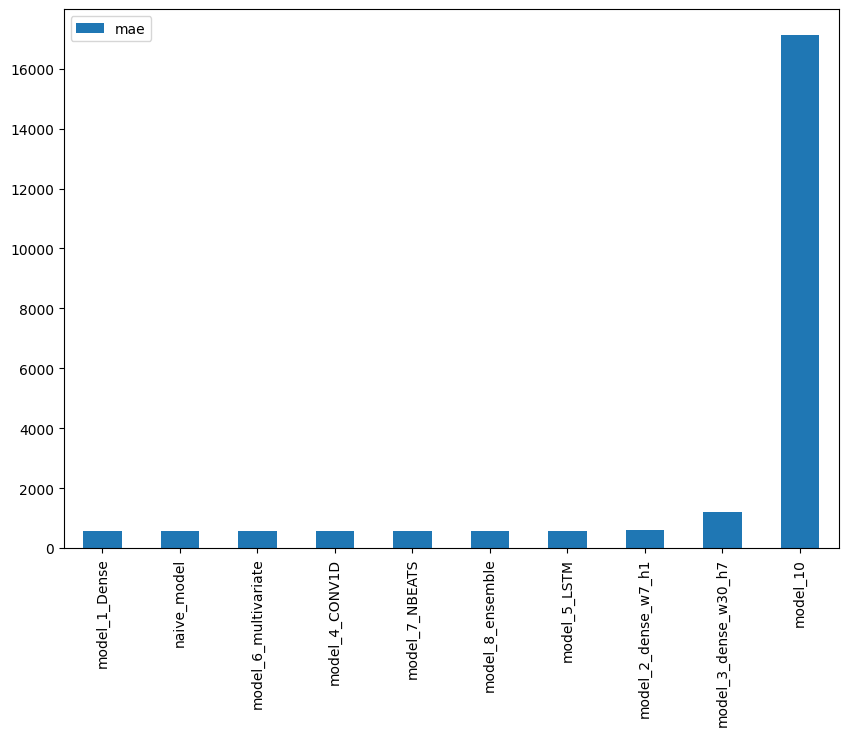

In [230]:
# Sort model results by MAE and plot them 
model_results[['mae']].sort_values(by='mae').plot(figsize=(10,7),kind='bar')